In [212]:
import pandas as pd

df = pd.read_csv("/Users/jortgommers/Desktop/ai/Vehicles_export_prices_scaled_train_eng.csv")


/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_16174/1416069011.py:3: DtypeWarning: Columns (16,24,26,36,38,64,80,99,103,104,105) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/jortgommers/Desktop/ai/Vehicles_export_prices_scaled_train_eng.csv")


In [213]:
# Controleer op missende waarden in de geselecteerde kolommen
missing_values = df.isnull().sum()

# Toon alle rijen
pd.set_option("display.max_rows", None)

print(missing_values)

RPAKREP_VEHICLE_HKEY                  0
COMPANY                              31
OFFICE                               65
OFFICE_MAIN_BRAND                  2143
CHASSIS_NUMBER                       31
MANUFACTURER_SHORT                   63
MANUFACTURER                         84
VEHICLE_GROUP                       140
VEHICLE_TYPE                        108
MODEL_CODE                        22198
VARIANT                           96764
MILEAGE                              31
OPERATING_HOURS                      31
MILAGE_IN_FIELD                      33
MILAGE_SALES                         31
OPERATING_HOURS_SALES                31
RIM_KEY                           99053
COLOR_CODE                        31425
COLOR_CODE_NAME                      31
COLOR                              3853
COLOR_TYPE                           69
UPHOLSTERY_CODE                   30946
UPHOLSTERY                         3521
UPHOLSTERY_CODE_ALT                  71
CERTIFICATE_TYPE                  99056


# Removed Columns Due to Excessive Missing Values

The following columns have been removed due to a high number of missing values:

- **MODEL_CODE** (22,198 missing)
- **VARIANT** (96,764 missing)
- **RIM_KEY** (99,053 missing)
- **COLOR_CODE** (31,425 missing)
- **UPHOLSTERY_CODE** (30,946 missing)
- **CERTIFICATE_TYPE** (99,056 missing)
- **FACTORY_NUMBER** (98,896 missing)
- **ENGINE_ID** (63,778 missing)
- **ENGINE_ID_ALT** (60,776 missing)
- **TRANSMISSION** (79,139 missing)
- **TRANSMISSION_ID** (82,788 missing)
- **RIMS** (99,003 missing)
- **FRONT_TIRES** (98,953 missing)
- **REAR_TIRES** (98,957 missing)
- **CONSTRUCTION_MONTH** (28,751 missing)
- **OPTICAL_CONDITION** (25,964 missing)
- **TECHNICAL_CONDITION** (26,014 missing)
- **DEMONSTRATION_STATUS** (98,168 missing)
- **LEASING_CONTRACT_DATE** (88,146 missing)
- **PRICE_LIST** (81,699 missing)
- **DAY_OF_REGISTRATION** (55,884 missing)
- **CUSTOMER_TYPE** (43,011 missing)
- **CUSTOMER_GROUP** (43,011 missing)
- **CUSTOMER_GROUP_NAME** (43,012 missing)
- **CUSTOMER_FEATURE** (43,011 missing)
- **CUSTOMER_FEATURE_NAME** (43,012 missing)
- **CUSTOMER_SALE_GROUP** (36,941 missing)
- **CUSTOMER_SALE_GROUP_NAME** (46,954 missing)
- **CUSTOMER_SALE_GROUP2** (36,941 missing)
- **CUSTOMER_SALE_GROUP2_NAME** (36,943 missing)

These columns were excluded due to the high percentage of missing values, which would have impacted data quality and analysis.

However, **YEAR_CONSTRUCTION** (24,705 missing) will be retained as it is an important factor for AR sales in my opinion.


# Column Removals and Adjustments

We have removed the following columns due to their lack of relevance or excessive missing data:

- **RPAKREP_VEHICLE_HKEY** and **Chassis Number**: These are not essential for car sales speed analysis.
- **Manufacturer Short**: We already have a shortened form of the manufacturer, so this is redundant.
- **Model Code**: This column is not important and contains a lot of missing values.
- **Operating Hours** and **Sales**: These columns are all zeros, and thus do not provide any meaningful information.
- **Mileage in Field**: We already track mileage in another format, making this column unnecessary.
- **Operating Hours Sales**: All values are zero.
- **Color Code, Color Code Name, and Color Type**: We have chosen to use just "Color" as the other options are either irrelevant or contain missing data.
- **Upholstery and Upholstery Code Alt**: These columns are either unimportant or contain too many empty values.
- **Certificate Type and Certificate Type Date**: These columns are empty and not relevant.
- **Number of Doors and Number of Seats**: These columns contain too many zeros. A car can’t have zero doors, and other features we track already indirectly correlate to the car’s size, which helps infer the number of doors and seats.
- **Permitted Total Weight and Curb Weight**: We prefer to use **Max Trailer Load** as it is a better representation of the car’s capacity.
- **Construction Month**: We already track the **Year of Construction**, so this is redundant.
- **Number of Axles and Engine Cylinders**: These columns are unnecessary and contain a lot of zeros.
- **Repair RKZ**: Not important and has too many zeros.
- **Commission Number**: This is not relevant for the analysis.
- **KW and CCM**: These are not needed since we use **Horsepower**, which is more commonly referenced.
- **Is Used Car**: This can be inferred from the **Number of Owners**, which provides similar information.
- **Leasing End and Leasing Mileage**: We use **Leasing Start** since it has a stronger correlation with **Laid Up Time**.
- **Paint Type**: This column is empty.
- **KAT Vehicle, Drive Type, and Drive Type Name**: These columns are either empty or not important.
- **Vehicle Model ID and Vehicle Model ID Name**: These are not needed for our analysis.
- **Commission Type Name**: We already use **Commission Type**, which provides the same information.
- **Purchase Booking Date**: We prefer to use the **Purchase Date** instead.
- **At Location Since**: Not relevant.
- **Sold Customer ID and Sold Invoice Customer ID**: These columns are not necessary for this analysis.
- **Mileage Sale, Operation Hours Sale**: These columns are irrelevant.
- **Customer Type, Customer Group, Customer Group Name, Customer Feature, and Customer Feature Name**: These columns are either unimportant or have too many missing values.
- **Customer Sale Group, Customer Sale Group Name, Customer Sale Group 2, and Customer Sale Group 2 Name**: These are not important or have too many missing values.
- **Scaled Inventural Value, Scaled Report Value, Scaled Valuation Price**: These columns contain too many zeros or repetitive values.
- **Scaled Total Sales Price Basis**: This is almost identical to **Scaled Total Sales Price**, so we opted to keep the latter.

These adjustments streamline the dataset and improve its focus on relevant data for our analysis.


# Important Columns for Sales Analysis

The following columns are important for analyzing car sales, as they provide key insights into various factors that influence the sale speed, pricing, and buyer interest:

- **COMPANY** and **OFFICE**: The location and sales tactics are critical in understanding how the vehicle is marketed and sold.
- **OFFICE_MAIN_BRAND**: This is relevant because the brand's market appeal and reputation play a significant role in sales.
- **MANUFACTURER_SHORT**: The manufacturer type is important, as the brand influences buyer preferences and the speed at which a vehicle is sold.
- **VEHICLE_GROUP** and **VEHICLE_TYPE**: The car’s type is a crucial factor in sales. Some types (e.g., SUVs, sedans) have higher demand, impacting the sales process.
- **MILEAGE** and **MILEAGE_SALES**: Mileage is one of the first factors buyers look at when purchasing a car. Higher mileage often means a lower price or slower sale.
- **COLOR**: The car’s color matters, as certain colors (like black or white) tend to sell faster than less popular ones (like pink or yellow).
- **MAX_TRAILER_LOAD**: For buyers who need to tow trailers or caravans, this is an important consideration.
- **YEAR_CONSTRUCTION**: The car’s age directly impacts its value and appeal. Older cars generally take longer to sell.
- **HORSEPOWER**: The power of the car is a key selling point, especially for luxury brands or performance cars.
- **NUMBER_OWNERS**: This helps determine if the car has been heavily used and how many previous owners it had, which affects its resale value.
- **FINANCING_TYPE**: Whether the car is available for leasing, buying outright, or through other financing options is important for buyer decision-making.
- **FUEL_TYPE_NAME**: The type of fuel (diesel, petrol, hybrid, etc.) affects the car’s appeal based on current trends and environmental concerns.
- **PURCHASE_DATE**: When the car was purchased helps measure how long it has been in the market and how long it will likely stay until sold.
- **PURCHASE_MILEAGE**: The mileage at the time of purchase is important, as it tells us how much the car has been driven since then.
- **LAID_UP_TIME**: This indicates how long the car has been out of use, which can affect its value and sale speed.
- **SCALED_CURRENT_VALUE**: The current market value is a key factor in pricing and sales predictions.
- **SCALED_GUIDE_PRICE**: The guide price helps in setting a benchmark for how quickly a car is likely to sell.
- **SCALED_TOTAL_SALE_PRICE**: The final sale price is an important indicator of how long it will take for a car to sell based on its price range.
- **ACCIDENT_VEHICLE**: Cars with previous accidents generally take longer to sell or may require a lower price due to damage history.
- **LEASING_START**: This date indicates when the car was leased and helps in predicting when it will be available for resale.
- **COMMISSION_TYPE**: This helps identify the vehicle's intended use (e.g., sales, fleet use, rental), which can influence the sale process.

These columns provide essential information that directly impacts car sales, pricing strategies, and time-to-sell predictions.


In [214]:
selected_columns = [
    'COMPANY', 'OFFICE', 'OFFICE_MAIN_BRAND', 'MANUFACTURER_SHORT', 'VEHICLE_GROUP', 
    'VEHICLE_TYPE', 'MILEAGE', 'MILAGE_SALES', 'COLOR', 'MAX_TRAILOR_LOAD', 'YEAR_CONSTRUCTION', 
    'HORSEPOWER', 'NUMBER_OWNERS', 'FINANCING_TYPE', 'FUEL_TYPE_NAME', 'PURCHASE_DATE','LAID_UP_TIME', 'SCALED_CURRENT_VALUE', 
    'SCALED_GUIDE_PRICE', 'SCALED_TOTAL_SALE_PRICE', 'ACCIDENT_VEHICLE','LEASING_START','COMMISSION_TYPE','VEHICLE_MODEL_ID_NAME'
]

# Filter de dataframe om alleen de geselecteerde kolommen te behouden
df_filtered = df[selected_columns]

# Toon het resultaat (optioneel)
print(df_filtered.head())

   COMPANY OFFICE OFFICE_MAIN_BRAND MANUFACTURER_SHORT VEHICLE_GROUP  \
0     44.0     TA               TOY                FOR           ECS   
1     12.0     44               VOL                VOL           XC4   
2     27.0     33               SKO                FOR           TOC   
3     33.0     K1                 V                  V           POL   
4     10.0     96               FOR                FOR           FOC   

                     VEHICLE_TYPE  MILEAGE  MILAGE_SALES  \
0       ECOSPORT 1.0 Titanium Eco   8600.0        8600.0   
1  XC40 B3 B DKG Core 120 kW, 5-t      0.0           0.0   
2       Tourneo Connect 2.0 EcoBl   1297.0           0.0   
3   POLO LIFE 1,0 L 59 KW (80 PS)   6020.0        6020.0   
4  FOCUS TITA 5W 1.0T 125 MHEV M6      0.0           0.0   

                       COLOR  MAX_TRAILOR_LOAD  ...  FUEL_TYPE_NAME  \
0     Magnetic-Grau Metallic               0.0  ...        Bleifrei   
1      Onyx Schwarz-Metallic               0.0  ...          And

In [215]:
# Controleer op missende waarden in de geselecteerde kolommen
missing_values = df_filtered.isnull().sum()

# Toon de missende waarden per kolom
print(missing_values)

COMPANY                       31
OFFICE                        65
OFFICE_MAIN_BRAND           2143
MANUFACTURER_SHORT            63
VEHICLE_GROUP                140
VEHICLE_TYPE                 108
MILEAGE                       31
MILAGE_SALES                  31
COLOR                       3853
MAX_TRAILOR_LOAD              67
YEAR_CONSTRUCTION          24705
HORSEPOWER                    67
NUMBER_OWNERS                 67
FINANCING_TYPE              2784
FUEL_TYPE_NAME                67
PURCHASE_DATE               2070
LAID_UP_TIME                  67
SCALED_CURRENT_VALUE          67
SCALED_GUIDE_PRICE            67
SCALED_TOTAL_SALE_PRICE       67
ACCIDENT_VEHICLE             881
LEASING_START              81965
COMMISSION_TYPE               67
VEHICLE_MODEL_ID_NAME         67
dtype: int64


In [216]:
# Maak een mask van NaN waarden
nan_mask = df_filtered.isna()

# Vergelijk de NaN-waarden tussen de kolommen
nan_comparison = nan_mask.corr()  # Dit geeft een correlatiematrix van NaN waarden

print(nan_comparison)


                          COMPANY    OFFICE  OFFICE_MAIN_BRAND  \
COMPANY                  1.000000  0.690478           0.118984   
OFFICE                   0.690478  1.000000           0.172321   
OFFICE_MAIN_BRAND        0.118984  0.172321           1.000000   
MANUFACTURER_SHORT       0.701359  0.484101           0.081572   
VEHICLE_GROUP            0.470303  0.324341           0.051665   
VEHICLE_TYPE             0.535550  0.369470           0.060269   
MILEAGE                  1.000000  0.690478           0.118984   
MILAGE_SALES             1.000000  0.690478           0.118984   
COLOR                    0.087950  0.058052          -0.018426   
MAX_TRAILOR_LOAD         0.680087  0.469397           0.078871   
YEAR_CONSTRUCTION        0.030695  0.013477           0.020304   
HORSEPOWER               0.680087  0.469397           0.078871   
NUMBER_OWNERS            0.680087  0.469397           0.078871   
FINANCING_TYPE           0.104046  0.088669          -0.007230   
FUEL_TYPE_

The following columns have missing values at the same locations:

- MAX_TRAILOR_LOAD
- HORSEPOWER
- NUMBER_OWNERS
- FUEL_TYPE_NAME
- PURCHASE_MILAGE
- LAID_UP_TIME
- SCALED_CURRENT_VALUE
- SCALED_GUIDE_PRICE
- SCALED_TOTAL_SALE_PRICE
- COMMISSION_TYPE


In [217]:
df_cleaned = df_filtered.dropna(subset=['MAX_TRAILOR_LOAD', 'HORSEPOWER', 'NUMBER_OWNERS', 'FUEL_TYPE_NAME', 'LAID_UP_TIME', 'SCALED_CURRENT_VALUE', 'SCALED_GUIDE_PRICE', 'SCALED_TOTAL_SALE_PRICE', 'COMMISSION_TYPE'])

print(df_cleaned.head())

   COMPANY OFFICE OFFICE_MAIN_BRAND MANUFACTURER_SHORT VEHICLE_GROUP  \
0     44.0     TA               TOY                FOR           ECS   
1     12.0     44               VOL                VOL           XC4   
2     27.0     33               SKO                FOR           TOC   
3     33.0     K1                 V                  V           POL   
4     10.0     96               FOR                FOR           FOC   

                     VEHICLE_TYPE  MILEAGE  MILAGE_SALES  \
0       ECOSPORT 1.0 Titanium Eco   8600.0        8600.0   
1  XC40 B3 B DKG Core 120 kW, 5-t      0.0           0.0   
2       Tourneo Connect 2.0 EcoBl   1297.0           0.0   
3   POLO LIFE 1,0 L 59 KW (80 PS)   6020.0        6020.0   
4  FOCUS TITA 5W 1.0T 125 MHEV M6      0.0           0.0   

                       COLOR  MAX_TRAILOR_LOAD  ...  FUEL_TYPE_NAME  \
0     Magnetic-Grau Metallic               0.0  ...        Bleifrei   
1      Onyx Schwarz-Metallic               0.0  ...          And

In [218]:
# Controleer op missende waarden in de geselecteerde kolommen
missing_values = df_cleaned.isnull().sum()

# Toon de missende waarden per kolom
print(missing_values)

COMPANY                        0
OFFICE                        34
OFFICE_MAIN_BRAND           2112
MANUFACTURER_SHORT            32
VEHICLE_GROUP                109
VEHICLE_TYPE                  77
MILEAGE                        0
MILAGE_SALES                   0
COLOR                       3822
MAX_TRAILOR_LOAD               0
YEAR_CONSTRUCTION          24638
HORSEPOWER                     0
NUMBER_OWNERS                  0
FINANCING_TYPE              2717
FUEL_TYPE_NAME                 0
PURCHASE_DATE               2003
LAID_UP_TIME                   0
SCALED_CURRENT_VALUE           0
SCALED_GUIDE_PRICE             0
SCALED_TOTAL_SALE_PRICE        0
ACCIDENT_VEHICLE             814
LEASING_START              81898
COMMISSION_TYPE                0
VEHICLE_MODEL_ID_NAME          0
dtype: int64


In [219]:
value_counts = df_cleaned['YEAR_CONSTRUCTION'].value_counts()
print(value_counts)


2023.0    20342
2022.0    12576
2024.0    10468
2021.0     8914
2020.0     5830
2019.0     5784
2018.0     2744
2017.0     1217
2016.0      895
2015.0      769
2014.0      614
2013.0      526
2012.0      486
2011.0      486
2025.0      378
2009.0      358
2010.0      321
2008.0      271
2005.0      269
2006.0      250
2007.0      224
2004.0      125
2003.0       98
2002.0       82
2000.0       81
2001.0       81
1999.0       60
1998.0       35
1993.0       13
1994.0       10
1996.0        8
1997.0        7
22.0          6
1995.0        5
1992.0        4
1974.0        4
1976.0        3
1.0           3
1990.0        3
1975.0        3
1991.0        2
1978.0        2
1980.0        1
1982.0        1
23.0          1
21.0          1
235.0         1
2033.0        1
520.0         1
1981.0        1
2027.0        1
Name: YEAR_CONSTRUCTION, dtype: int64


In [220]:
mode_value = df_cleaned['YEAR_CONSTRUCTION'].mode()[0]
df_cleaned['YEAR_CONSTRUCTION'].fillna(mode_value, inplace=True)


/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_16174/4200914533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['YEAR_CONSTRUCTION'].fillna(mode_value, inplace=True)


In [221]:
df_cleaned['OFFICE'] = df_cleaned['OFFICE'].fillna('unknown')
df_cleaned['OFFICE_MAIN_BRAND'] = df_cleaned['OFFICE_MAIN_BRAND'].fillna('unknown')
df_cleaned['VEHICLE_GROUP'] = df_cleaned['VEHICLE_GROUP'].fillna('unknown')
df_cleaned['VEHICLE_TYPE'] = df_cleaned['VEHICLE_TYPE'].fillna('unknown')
df_cleaned['MANUFACTURER_SHORT'] = df_cleaned['MANUFACTURER_SHORT'].fillna('unknown')



/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_16174/3975719206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['OFFICE'] = df_cleaned['OFFICE'].fillna('unknown')
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_16174/3975719206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['OFFICE_MAIN_BRAND'] = df_cleaned['OFFICE_MAIN_BRAND'].fillna('unknown')
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_16174/3975719206.py:3: SettingWithCopyWarning: 
A v

In [222]:
# Bekijk de frequentie van de verschillende kleuren
color_counts = df_cleaned['FINANCING_TYPE'].value_counts(dropna=False)

# Toon de meest voorkomende kleuren met hun aantallen
print(color_counts)


1      59850
3      19836
2      10438
5       2906
NaN     2717
4       2340
1.0      464
N        170
3.0      151
2.0       91
5.0       25
4.0       16
Name: FINANCING_TYPE, dtype: int64


In [223]:
# Bekijk de frequentie van de verschillende kleuren
color_counts = df_cleaned['ACCIDENT_VEHICLE'].value_counts(dropna=False)

# Toon de meest voorkomende kleuren met hun aantallen
print(color_counts)

N      89235
1       8955
NaN      814
Name: ACCIDENT_VEHICLE, dtype: int64


In [224]:
# Vervang NaN en 'N' met 0 in de 'ACCIDENT_VEHICLE' kolom
df_cleaned['ACCIDENT_VEHICLE'] = df_cleaned['ACCIDENT_VEHICLE'].fillna(0)
df_cleaned['ACCIDENT_VEHICLE'] = df_cleaned['ACCIDENT_VEHICLE'].replace('N', 0)


/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_16174/1364127017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ACCIDENT_VEHICLE'] = df_cleaned['ACCIDENT_VEHICLE'].fillna(0)
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_16174/1364127017.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ACCIDENT_VEHICLE'] = df_cleaned['ACCIDENT_VEHICLE'].replace('N', 0)


In [225]:
# Eerst de 'N' vervangen door een numerieke waarde, bijvoorbeeld 0
df_cleaned['FINANCING_TYPE'] = df_cleaned['FINANCING_TYPE'].replace('N', 1.0)

# Converteer de kolom naar numeriek type, zodat alle waarden integer zijn en .0 verdwijnt
df_cleaned['FINANCING_TYPE'] = pd.to_numeric(df_cleaned['FINANCING_TYPE'], errors='coerce')

# Vind de modus (meest voorkomende waarde)
most_common_value = df_cleaned['FINANCING_TYPE'].mode()[0]

# Vul de NaN waarden met de modus
df_cleaned['FINANCING_TYPE'] = df_cleaned['FINANCING_TYPE'].fillna(most_common_value)

# Bekijk de frequentie van de verschillende waarden na de verandering
financing_type_counts = df_cleaned['FINANCING_TYPE'].value_counts(dropna=False)

# Toon de meest voorkomende waarden met hun aantallen
print(financing_type_counts)


1.0    63201
3.0    19987
2.0    10529
5.0     2931
4.0     2356
Name: FINANCING_TYPE, dtype: int64


/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_16174/1962010206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['FINANCING_TYPE'] = df_cleaned['FINANCING_TYPE'].replace('N', 1.0)
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_16174/1962010206.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['FINANCING_TYPE'] = pd.to_numeric(df_cleaned['FINANCING_TYPE'], errors='coerce')
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_16174/1962010206.py:11: Set

In [226]:
# Vervang NaN met de modus van de 'PURCHASE_DATE'
most_common_date = df_cleaned['PURCHASE_DATE'].mode()[0]
df_cleaned['PURCHASE_DATE'] = df_cleaned['PURCHASE_DATE'].fillna(most_common_date)


/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_16174/1103471389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['PURCHASE_DATE'] = df_cleaned['PURCHASE_DATE'].fillna(most_common_date)


In [227]:
import random

# Krijg de top 10 meest voorkomende kleuren (exclusief NaN)
top_10_colors = df_cleaned['COLOR'].value_counts(dropna=True).head(10).index

# Vul de missende waarden met een willekeurige kleur uit de top 10
df_cleaned['COLOR'] = df_cleaned['COLOR'].apply(lambda x: random.choice(top_10_colors) if pd.isna(x) else x)


/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_16174/1679597604.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['COLOR'] = df_cleaned['COLOR'].apply(lambda x: random.choice(top_10_colors) if pd.isna(x) else x)


In [228]:
# Zorg ervoor dat de datums goed zijn geparsed als datetime objecten
df_cleaned['LEASING_START'] = pd.to_datetime(df_cleaned['LEASING_START'])
df_cleaned['PURCHASE_DATE'] = pd.to_datetime(df_cleaned['PURCHASE_DATE'])

# Bereken het verschil in dagen tussen LEASING_START en PURCHASE_DATE
df_cleaned['days_between_leasing_and_purchase'] = (df_cleaned['LEASING_START'] - df_cleaned['PURCHASE_DATE']).dt.days


/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_16174/2791429036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['LEASING_START'] = pd.to_datetime(df_cleaned['LEASING_START'])
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_16174/2791429036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['PURCHASE_DATE'] = pd.to_datetime(df_cleaned['PURCHASE_DATE'])
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_16174/2791429036.py:6: SettingWithCopyWarning: 
A

In [229]:
# Controleer op missende waarden in de geselecteerde kolommen
missing_values = df_cleaned.isnull().sum()

# Toon de missende waarden per kolom
print(missing_values)

COMPANY                                  0
OFFICE                                   0
OFFICE_MAIN_BRAND                        0
MANUFACTURER_SHORT                       0
VEHICLE_GROUP                            0
VEHICLE_TYPE                             0
MILEAGE                                  0
MILAGE_SALES                             0
COLOR                                    0
MAX_TRAILOR_LOAD                         0
YEAR_CONSTRUCTION                        0
HORSEPOWER                               0
NUMBER_OWNERS                            0
FINANCING_TYPE                           0
FUEL_TYPE_NAME                           0
PURCHASE_DATE                            0
LAID_UP_TIME                             0
SCALED_CURRENT_VALUE                     0
SCALED_GUIDE_PRICE                       0
SCALED_TOTAL_SALE_PRICE                  0
ACCIDENT_VEHICLE                         0
LEASING_START                        81898
COMMISSION_TYPE                          0
VEHICLE_MOD

In [230]:
df_cleaned = df_cleaned.drop(columns=['LEASING_START'])
df_cleaned['days_between_leasing_and_purchase'] = df_cleaned['days_between_leasing_and_purchase'].fillna(0)


In [231]:
# Controleer op missende waarden in de geselecteerde kolommen
missing_values = df_cleaned.isnull().sum()

# Toon de missende waarden per kolom
print(missing_values)

COMPANY                              0
OFFICE                               0
OFFICE_MAIN_BRAND                    0
MANUFACTURER_SHORT                   0
VEHICLE_GROUP                        0
VEHICLE_TYPE                         0
MILEAGE                              0
MILAGE_SALES                         0
COLOR                                0
MAX_TRAILOR_LOAD                     0
YEAR_CONSTRUCTION                    0
HORSEPOWER                           0
NUMBER_OWNERS                        0
FINANCING_TYPE                       0
FUEL_TYPE_NAME                       0
PURCHASE_DATE                        0
LAID_UP_TIME                         0
SCALED_CURRENT_VALUE                 0
SCALED_GUIDE_PRICE                   0
SCALED_TOTAL_SALE_PRICE              0
ACCIDENT_VEHICLE                     0
COMMISSION_TYPE                      0
VEHICLE_MODEL_ID_NAME                0
days_between_leasing_and_purchase    0
dtype: int64


# Numerical data distribution analysis.

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

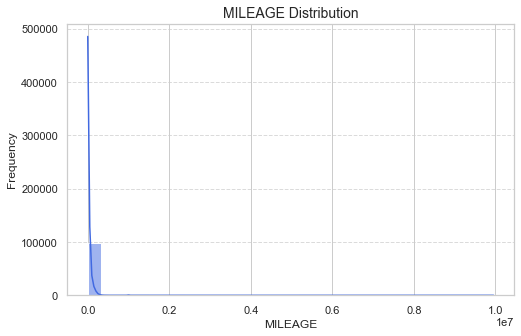

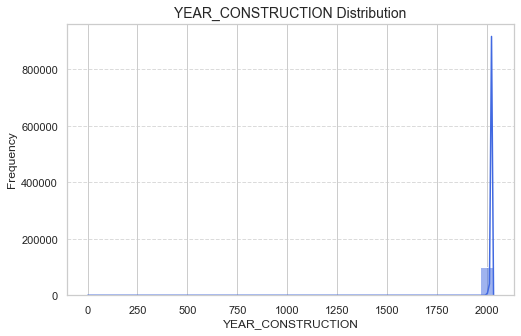

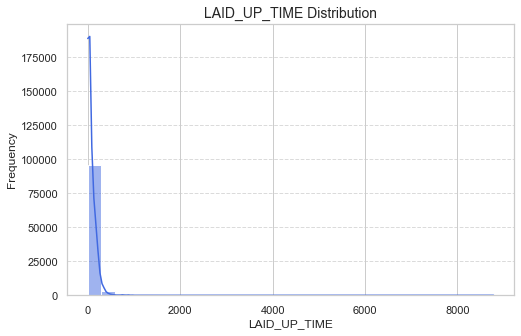

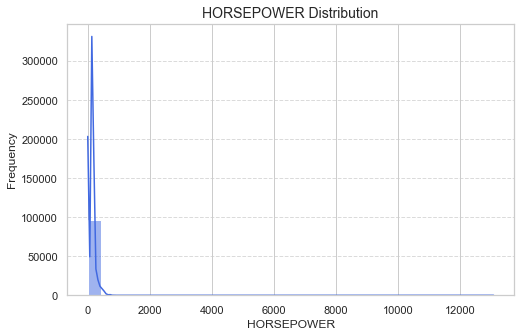

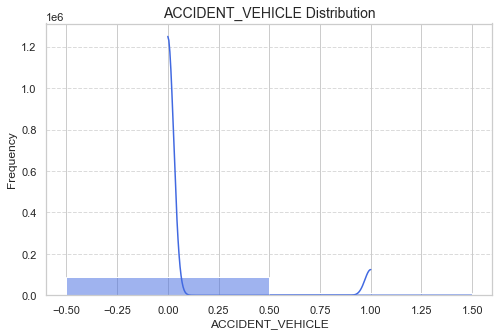

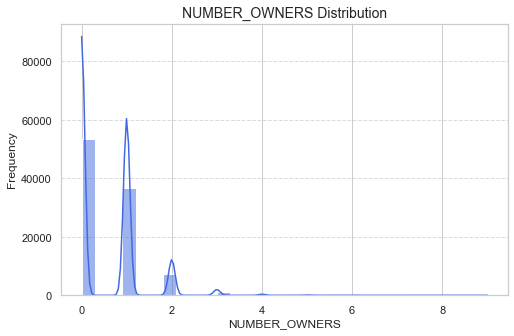

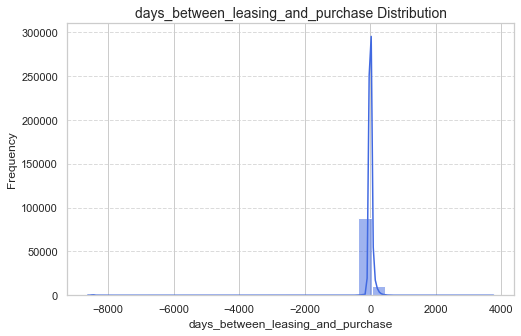

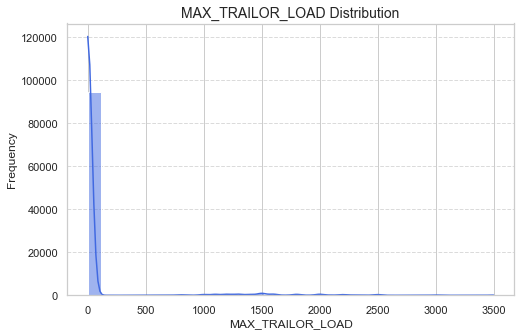

In [233]:
features_hist = ['MILEAGE', 'YEAR_CONSTRUCTION', 'LAID_UP_TIME','HORSEPOWER','ACCIDENT_VEHICLE','NUMBER_OWNERS','days_between_leasing_and_purchase',
                 'MAX_TRAILOR_LOAD']
for feature in features_hist:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_cleaned[feature], bins=30, kde=True, color="royalblue")
    plt.title(f'{feature} Distribution', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

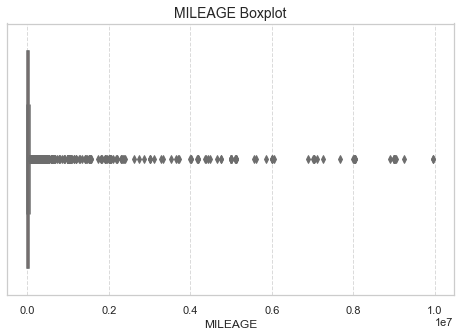

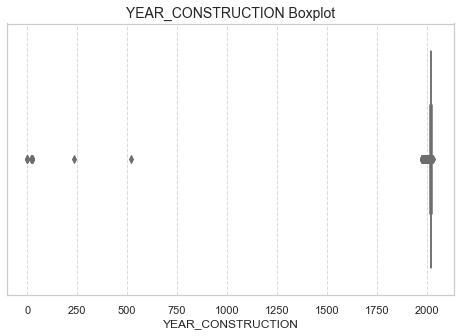

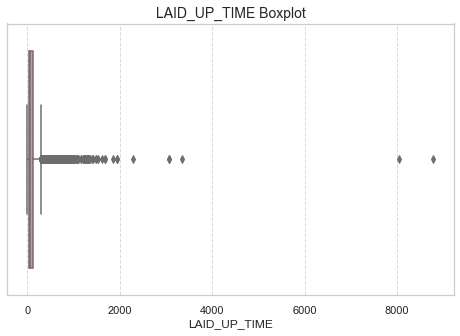

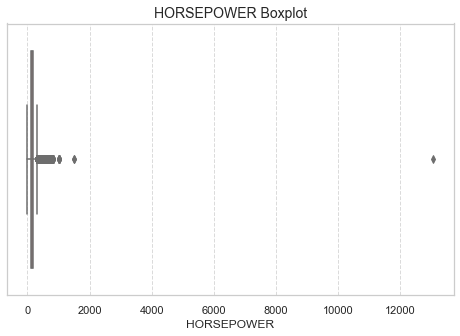

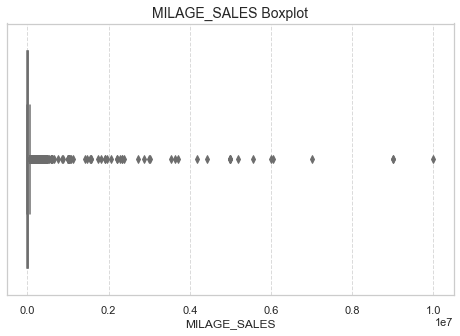

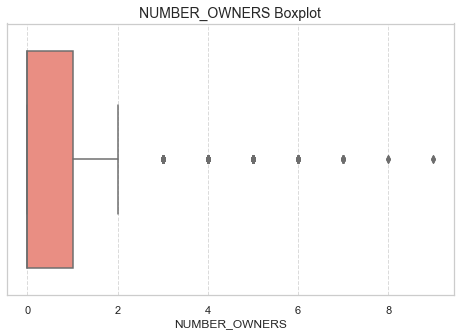

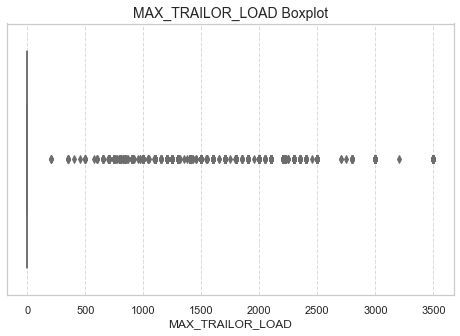

In [234]:
# Individuele boxplots
features_box = ['MILEAGE', 'YEAR_CONSTRUCTION', 'LAID_UP_TIME','HORSEPOWER','MILAGE_SALES','NUMBER_OWNERS','MAX_TRAILOR_LOAD']
for feature in features_box:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_cleaned[feature], color="salmon")
    plt.title(f'{feature} Boxplot', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

This dataset contains cars listed with the year 750, which is impossible. To improve data quality, I will take this action replacing incorrect values with reasonable estimates. This will help maintain the accuracy and reliability of the dataset.

In [235]:
# Calculate the mode of the valid 'YEAR_CONSTRUCTION' values (between 1900 and 2027)
valid_years = df_cleaned[(df_cleaned["YEAR_CONSTRUCTION"] >= 1900) & (df_cleaned["YEAR_CONSTRUCTION"] <= 2026)]
mode_year = valid_years["YEAR_CONSTRUCTION"].mode()[0]

# Replace all values before 1900 or after 2027 with the mode
df_cleaned.loc[(df_cleaned["YEAR_CONSTRUCTION"] < 1900) | (df_cleaned["YEAR_CONSTRUCTION"] > 2027), "YEAR_CONSTRUCTION"] = mode_year


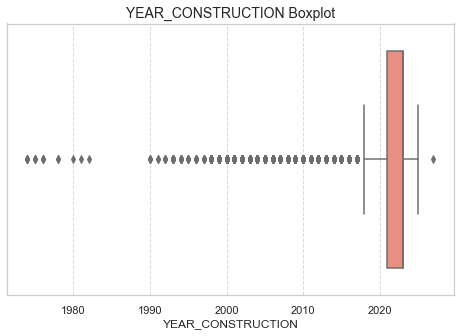

In [236]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned["YEAR_CONSTRUCTION"], color="salmon")
plt.title("YEAR_CONSTRUCTION Boxplot", fontsize=14)
plt.xlabel("YEAR_CONSTRUCTION", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [237]:
# Laagste MILEAGE
min_mileage = df_cleaned["MILEAGE"].min()

# Hoogste MILEAGE
max_mileage = df_cleaned["MILEAGE"].max()

print(f"Laagste MILEAGE: {min_mileage}")
print(f"Hoogste MILEAGE: {max_mileage}")


Laagste MILEAGE: 0.0
Hoogste MILEAGE: 9960005.0


In [238]:
# Vind de rij met de hoogste MILEAGE
max_mileage_row = df_cleaned.loc[df_cleaned["MILEAGE"].idxmax()]

# Haal de waarde van MILEAGE_SALES op deze positie
max_mileage_sales = max_mileage_row["MILAGE_SALES"]

print(f"De MILEAGE_SALES waarde bij de hoogste MILEAGE ({max_mileage_row['MILEAGE']}) is: {max_mileage_sales}")


De MILEAGE_SALES waarde bij de hoogste MILEAGE (9960005.0) is: 12.0


In [239]:
# Sorteer de dataset op MILEAGE in aflopende volgorde en pak de top 10
top_10_mileage = df_cleaned.sort_values(by="MILEAGE", ascending=False).head(10)

# Laat de relevante kolommen zien: MILEAGE en MILEAGE_SALES
top_10_mileage = top_10_mileage[["MILEAGE", "MILAGE_SALES"]]

print(top_10_mileage)


         MILEAGE  MILAGE_SALES
21674  9960005.0          12.0
80564  9960005.0          12.0
37476  9233501.0      117507.0
22143  9035664.0       35664.0
190    9012114.0       12114.0
66720  9000010.0          10.0
65795  9000010.0          10.0
36389  9000010.0          10.0
83593  9000010.0          10.0
91274  9000010.0          10.0


In [240]:
# Vervang MILEAGE door MILEAGE_SALES als MILEAGE groter is dan 500,000
df_cleaned["MILEAGE"] = df_cleaned.apply(
    lambda row: row["MILAGE_SALES"] if row["MILEAGE"] > 500000 else row["MILEAGE"], axis=1
)

# Controleer de verandering
print(df_cleaned[df_cleaned["MILEAGE"] > 500000][["MILEAGE", "MILAGE_SALES"]])

         MILEAGE  MILAGE_SALES
1469   1725160.0     1725160.0
2513   2724949.0     2724949.0
5591    763350.0      763350.0
6049    588000.0      588000.0
7026   1903999.0     1903999.0
7743    519195.0      519195.0
8556   1963341.0     1963341.0
13013  3532200.0     3532200.0
13924  7008500.0     7008500.0
14078  4428001.0     4428001.0
17673  1801535.0     1801535.0
17816  1000010.0     1000010.0
17932  5000005.0     5000005.0
18294  6057300.0     6057300.0
19070  2325959.0     2325959.0
21507  2871701.0     2871701.0
22461  5999999.0     5999999.0
22686   613440.0      613440.0
23922  1458386.0     1458386.0
25602  1074082.0     1074082.0
26669  1920222.0     1920222.0
27312  2050000.0     2050000.0
29398   594000.0      594000.0
29956   999663.0      999663.0
32820  2200000.0     2200000.0
36405  4171208.0     4171208.0
37349  5555555.0     5555555.0
40543  2200000.0     2200000.0
42627   653230.0      653230.0
46220  5000005.0     5000005.0
47134  3636465.0     3636465.0
47992  1

In [241]:
# Sorteer de dataset op MILEAGE in aflopende volgorde en pak de top 10
top_10_mileage = df_cleaned.sort_values(by="MILEAGE", ascending=False).head(10)

# Laat de relevante kolommen zien: MILEAGE en MILEAGE_SALES
top_10_mileage = top_10_mileage[["MILEAGE", "MILAGE_SALES"]]

print(top_10_mileage)


         MILEAGE  MILAGE_SALES
59762  9000010.0     9000010.0
13924  7008500.0     7008500.0
18294  6057300.0     6057300.0
22461  5999999.0     5999999.0
37349  5555555.0     5555555.0
85453  5000005.0     5000005.0
95345  5000005.0     5000005.0
46220  5000005.0     5000005.0
17932  5000005.0     5000005.0
14078  4428001.0     4428001.0


In [242]:
df_cleaned["MILEAGE"] = np.log1p(df_cleaned["MILEAGE"])

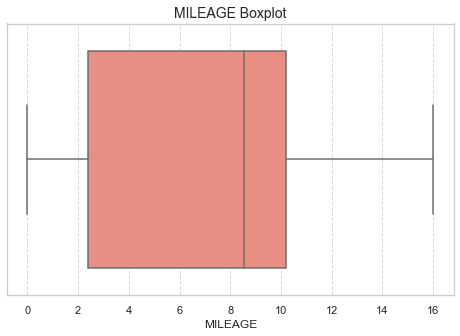

In [243]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned["MILEAGE"], color="salmon")
plt.title("MILEAGE Boxplot", fontsize=14)
plt.xlabel("MILEAGE", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [244]:
# Laagste LAID_UP_TIME
min_mileage = df_cleaned["LAID_UP_TIME"].min()

# Hoogste LAID_UP_TIME
max_mileage = df_cleaned["LAID_UP_TIME"].max()

print(f"Laagste LAID_UP_TIME: {min_mileage}")
print(f"Hoogste LAID_UP_TIME: {max_mileage}")


Laagste LAID_UP_TIME: 0.0
Hoogste LAID_UP_TIME: 8782.0


Dit staat gelijk aan 24 jaar niet verkocht dit is mogelijk maar we kunnen kijken naar YEAR_CONSTRUCTION of dit mogelijk is.

In [245]:
# Sorteer de dataset op MILEAGE in aflopende volgorde en pak de top 10
top_10_mileage = df_cleaned.sort_values(by="LAID_UP_TIME", ascending=False).head(10)

# Laat de relevante kolommen zien: MILEAGE en MILEAGE_SALES
top_10_mileage = top_10_mileage[["LAID_UP_TIME", "YEAR_CONSTRUCTION"]]

print(top_10_mileage)


       LAID_UP_TIME  YEAR_CONSTRUCTION
59621        8782.0             2019.0
38061        8046.0             2020.0
2176         3346.0             2006.0
17216        3058.0             2009.0
11639        3058.0             2009.0
12334        2288.0             2017.0
89424        1947.0             2018.0
29398        1947.0             2018.0
69555        1854.0             2016.0
51846        1668.0             2023.0


In [246]:
# Verwijder de rijen waar LAID_UP_TIME > 7000
df_cleaned = df_cleaned[df_cleaned["LAID_UP_TIME"] <= 7000]

In [247]:
# Sorteer de dataset op MILEAGE in aflopende volgorde en pak de top 10
top_10_mileage = df_cleaned.sort_values(by="LAID_UP_TIME", ascending=False).head(10)

# Laat de relevante kolommen zien: MILEAGE en MILEAGE_SALES
top_10_mileage = top_10_mileage[["LAID_UP_TIME", "YEAR_CONSTRUCTION"]]

print(top_10_mileage)


       LAID_UP_TIME  YEAR_CONSTRUCTION
2176         3346.0             2006.0
17216        3058.0             2009.0
11639        3058.0             2009.0
12334        2288.0             2017.0
29398        1947.0             2018.0
89424        1947.0             2018.0
69555        1854.0             2016.0
51846        1668.0             2023.0
15845        1668.0             2023.0
5468         1617.0             2017.0


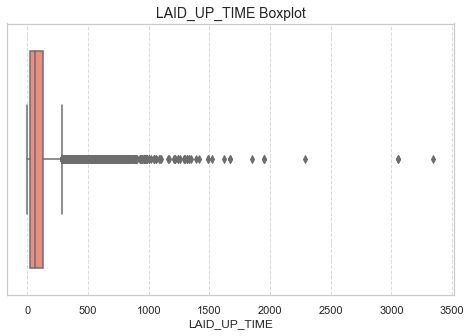

In [248]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned["LAID_UP_TIME"], color="salmon")
plt.title("LAID_UP_TIME Boxplot", fontsize=14)
plt.xlabel("LAID_UP_TIME", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [249]:
# Converteer LAID_UP_TIME van dagen naar jaren in memory en voeg YEAR_CONSTRUCTION toe
condition = (df_cleaned["LAID_UP_TIME"] / 365) + df_cleaned["YEAR_CONSTRUCTION"] > 2027

# Filter de rijen waar de som groter is dan 2027
filtered_rows = df_cleaned[condition]

# Bekijk het aantal van deze rijen
num_filtered_rows = filtered_rows.shape[0]
print(num_filtered_rows)

    

3


In [250]:
# Sorteer de dataset op MILEAGE in aflopende volgorde en pak de top 10
top_10_mileage = df_cleaned.sort_values(by="HORSEPOWER", ascending=False).head(10)

# Laat de relevante kolommen zien: MILEAGE en MILEAGE_SALES
top_10_mileage = top_10_mileage[["HORSEPOWER",'VEHICLE_GROUP','VEHICLE_TYPE']]

print(top_10_mileage)


       HORSEPOWER VEHICLE_GROUP                    VEHICLE_TYPE
7069      13067.0           OPM  Mokka Elegance 1.2 Direct Inje
51498      1496.0           TIG  TIGUAN R-LINE 2,0 L TDI SCR 4M
40245      1496.0           KRO  KAROQ          AMB    TS  110/
44206      1030.0           21F                  SF90 XX Spider
42199      1018.0           OPA  Corsa Elegance 1.2 Direct Inje
77419       999.0           FER                     SF90 Spider
21372       999.0           06F             SF90 Stradale Coupe
12454       999.0           07F                     SF90 Spider
24571       999.0           06F                   SF90 Stradale
63936       999.0           06F                   SF90 Stradale


In [251]:
# Maak een mapping van de VEHICLE_TYPE naar de juiste HORSEPOWER
correct_horsepower = {
    "Mokka Elegance 1.2 Direct Inje": 130,
    "TIGUAN R-LINE 2,0 L TDI SCR 4M": 150,
    "KAROQ          AMB    TS  110/":  110,
    "Corsa Elegance 1.2 Direct Inje": 90
}

# Pas de HORSEPOWER aan voor de specifieke VEHICLE_TYPE's
for vehicle_type, hp in correct_horsepower.items():
    df_cleaned.loc[df_cleaned["VEHICLE_TYPE"] == vehicle_type, "HORSEPOWER"] = hp

In [252]:
# Sorteer de dataset op MILEAGE in aflopende volgorde en pak de top 10
top_10_mileage = df_cleaned.sort_values(by="HORSEPOWER", ascending=False).head(10)

# Laat de relevante kolommen zien: MILEAGE en MILEAGE_SALES
top_10_mileage = top_10_mileage[["HORSEPOWER",'VEHICLE_GROUP','VEHICLE_TYPE']]

print(top_10_mileage)


       HORSEPOWER VEHICLE_GROUP         VEHICLE_TYPE
44206      1030.0           21F       SF90 XX Spider
24571       999.0           06F        SF90 Stradale
77419       999.0           FER          SF90 Spider
29376       999.0           GW1        SF90 Stradale
21372       999.0           06F  SF90 Stradale Coupe
63936       999.0           06F        SF90 Stradale
57768       999.0           FER  SF90 Stradale Coupe
36413       999.0           06F  SF90 Stradale Coupe
12454       999.0           07F          SF90 Spider
25992       830.0           04F               296GTB


In [253]:
# Sorteer de dataset op MILEAGE in aflopende volgorde en pak de top 10
top_10_mileage = df_cleaned.sort_values(by="NUMBER_OWNERS", ascending=False).head(10)

# Laat de relevante kolommen zien: MILEAGE en MILEAGE_SALES
top_10_mileage = top_10_mileage[["NUMBER_OWNERS"]]

print(top_10_mileage)

       NUMBER_OWNERS
87656            9.0
63536            9.0
40380            8.0
85351            8.0
91582            7.0
34356            7.0
77848            7.0
91159            7.0
81219            7.0
67133            7.0


In [254]:
# Bekijk de frequentie van de unieke waarden in de kolom 'ACCIDENT_VEHICLE'
value_counts = df_cleaned["ACCIDENT_VEHICLE"].value_counts()

# Print de top 10 meest voorkomende waarden
print(value_counts.head(10))


0    90047
1     8955
Name: ACCIDENT_VEHICLE, dtype: int64


In [255]:
# Converteer de kolom 'ACCIDENT_VEHICLE' naar numerieke waarden
df_cleaned["ACCIDENT_VEHICLE"] = pd.to_numeric(df_cleaned["ACCIDENT_VEHICLE"], errors="coerce")

# Sorteer de dataset op ACCIDENT_VEHICLE in aflopende volgorde en pak de top 10
top_10_ACCIDENT_VEHICLE = df_cleaned.sort_values(by="ACCIDENT_VEHICLE", ascending=False).head(10)

# Laat de relevante kolommen zien: 
top_10_ACCIDENT_VEHICLE = top_10_ACCIDENT_VEHICLE[["ACCIDENT_VEHICLE"]]

print(top_10_ACCIDENT_VEHICLE)

       ACCIDENT_VEHICLE
91401                 1
68462                 1
68459                 1
90527                 1
9401                  1
68452                 1
58882                 1
79003                 1
9412                  1
90514                 1


In [256]:
# Laagste MAX_TRAILOR_LOAD
min_mileage = df_cleaned["MAX_TRAILOR_LOAD"].min()

# Hoogste MAX_TRAILOR_LOAD
max_mileage = df_cleaned["MAX_TRAILOR_LOAD"].max()

print(f"Laagste ]MAX_TRAILOR_LOAD: {min_mileage}")
print(f"Hoogste MAX_TRAILOR_LOAD: {max_mileage}")


Laagste ]MAX_TRAILOR_LOAD: 0.0
Hoogste MAX_TRAILOR_LOAD: 3500.0


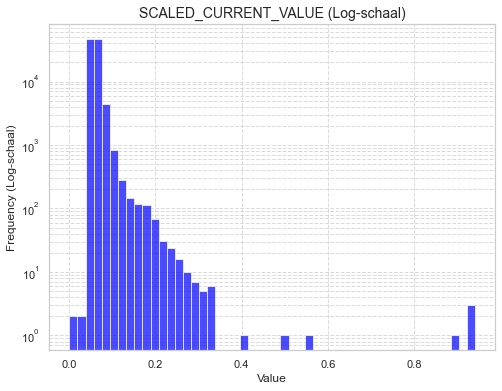

In [257]:
import matplotlib.pyplot as plt
import numpy as np

# Converteer de kolom naar numerieke waarden en zet niet-numerieke waarden om naar NaN
df_cleaned["SCALED_CURRENT_VALUE"] = pd.to_numeric(df_cleaned["SCALED_CURRENT_VALUE"], errors="coerce")

# Stel dat je een van de kolommen wilt visualiseren
plt.figure(figsize=(8, 6))

# Maak een histogram of verdelingsgrafiek
plt.hist(df_cleaned["SCALED_CURRENT_VALUE"].dropna(), bins=50, color='blue', alpha=0.7)

# Gebruik een logaritmische schaal voor de y-as
plt.yscale('log')

plt.title("SCALED_CURRENT_VALUE (Log-schaal)", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Frequency (Log-schaal)", fontsize=12)
plt.grid(True, which="both", linestyle='--', alpha=0.7)
plt.show()


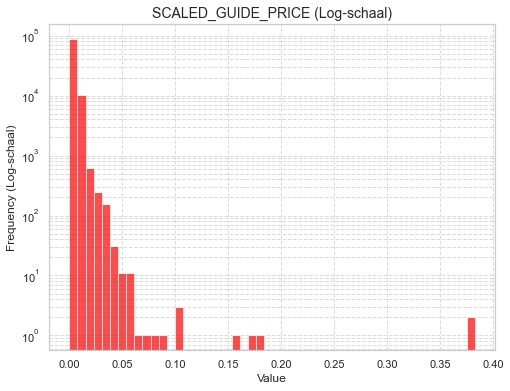

In [258]:
import matplotlib.pyplot as plt
import numpy as np

# Converteer de kolom naar numerieke waarden en zet niet-numerieke waarden om naar NaN
df_cleaned["SCALED_GUIDE_PRICE"] = pd.to_numeric(df_cleaned["SCALED_GUIDE_PRICE"], errors="coerce")

# Stel dat je een van de kolommen wilt visualiseren
plt.figure(figsize=(8, 6))

# Maak een histogram of verdelingsgrafiek
plt.hist(df_cleaned["SCALED_GUIDE_PRICE"].dropna(), bins=50, color='red', alpha=0.7)

# Gebruik een logaritmische schaal voor de y-as
plt.yscale('log')

plt.title("SCALED_GUIDE_PRICE (Log-schaal)", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Frequency (Log-schaal)", fontsize=12)
plt.grid(True, which="both", linestyle='--', alpha=0.7)
plt.show()


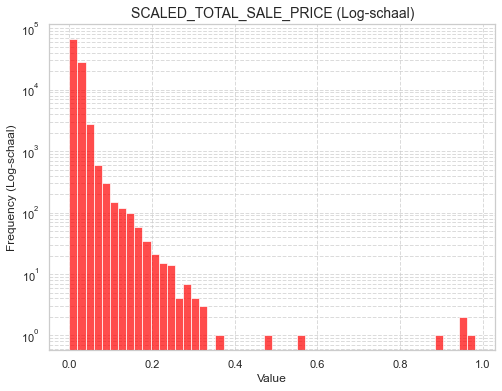

In [259]:
import matplotlib.pyplot as plt
import numpy as np

# Converteer de kolom naar numerieke waarden en zet niet-numerieke waarden om naar NaN
df_cleaned["SCALED_TOTAL_SALE_PRICE"] = pd.to_numeric(df_cleaned["SCALED_TOTAL_SALE_PRICE"], errors="coerce")

# Stel dat je een van de kolommen wilt visualiseren
plt.figure(figsize=(8, 6))

# Maak een histogram of verdelingsgrafiek
plt.hist(df_cleaned["SCALED_TOTAL_SALE_PRICE"].dropna(), bins=50, color='red', alpha=0.7)

# Gebruik een logaritmische schaal voor de y-as
plt.yscale('log')

plt.title("SCALED_TOTAL_SALE_PRICE (Log-schaal)", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Frequency (Log-schaal)", fontsize=12)
plt.grid(True, which="both", linestyle='--', alpha=0.7)
plt.show()


In [260]:
# Gebruik value_counts om de frequentie van de waarden in de kolom te bekijken
most_common_value = df_cleaned["SCALED_CURRENT_VALUE"].value_counts().idxmax()

# Print de meest voorkomende waarde
print(f"Meest voorkomende waarde: {most_common_value}")

# Gebruik value_counts om de frequentie van de waarden in de kolom te bekijken
most_common_value = df_cleaned["SCALED_TOTAL_SALE_PRICE"].value_counts().idxmax()

# Print de meest voorkomende waarde
print(f"Meest voorkomende waarde: {most_common_value}")

# Gebruik value_counts om de frequentie van de waarden in de kolom te bekijken
most_common_value = df_cleaned["SCALED_GUIDE_PRICE"].value_counts().idxmax()

# Print de meest voorkomende waarde
print(f"Meest voorkomende waarde: {most_common_value}")


Meest voorkomende waarde: 0.04256523
Meest voorkomende waarde: 0.00057203
Meest voorkomende waarde: 0.0013781


In [261]:
# Sorteer de dataset op MILEAGE in aflopende volgorde en pak de top 10
top_10_mileage = df_cleaned.sort_values(by="days_between_leasing_and_purchase", ascending=False).head(10)

# Laat de relevante kolommen zien: MILEAGE en MILEAGE_SALES
top_10_mileage = top_10_mileage[["days_between_leasing_and_purchase"]]

print(top_10_mileage) 

       days_between_leasing_and_purchase
23386                             3762.0
91878                             2735.0
19763                             1975.0
29675                             1869.0
84715                             1866.0
49329                             1863.0
14928                             1671.0
82840                             1527.0
11604                             1520.0
6756                              1505.0


In [262]:
# Laagste days_between_leasing_and_purchase
min_mileage = df_cleaned["days_between_leasing_and_purchase"].min()

# Hoogste days_between_leasing_and_purchase
max_mileage = df_cleaned["days_between_leasing_and_purchase"].max()

print(f"Laagste days_between_leasing_and_purchase: {min_mileage}")
print(f"Hoogste days_between_leasing_and_purchase: {max_mileage}")


Laagste days_between_leasing_and_purchase: -8619.0
Hoogste days_between_leasing_and_purchase: 3762.0


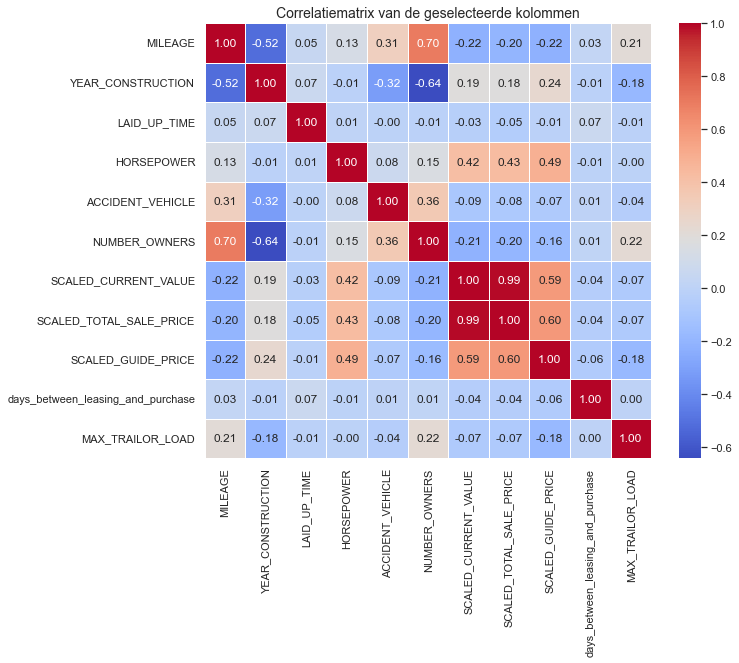

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecteer de kolommen voor de correlatiematrix
columns = ['MILEAGE', 'YEAR_CONSTRUCTION', 'LAID_UP_TIME', 'HORSEPOWER', 
           'ACCIDENT_VEHICLE', 'NUMBER_OWNERS', 
           'SCALED_CURRENT_VALUE', 'SCALED_TOTAL_SALE_PRICE', 'SCALED_GUIDE_PRICE','days_between_leasing_and_purchase','MAX_TRAILOR_LOAD']

# Bereken de correlatiematrix
correlation_matrix = df_cleaned[columns].corr()

# Maak de plot
plt.figure(figsize=(10, 8))

# Maak de heatmap van de correlatiematrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Voeg een titel toe
plt.title("Correlatiematrix van de geselecteerde kolommen", fontsize=14)

# Toon de grafiek
plt.show()


In [264]:
# Vervang alle negatieve waarden in 'days_between_leasing_and_purchase' door 0
df_cleaned['days_between_leasing_and_purchase'] = df_cleaned['days_between_leasing_and_purchase'].apply(lambda x: max(x, 0))

# Controleer of het is gelukt
print(df_cleaned['days_between_leasing_and_purchase'].head())


0     0.0
1    22.0
2    13.0
3     0.0
4    56.0
Name: days_between_leasing_and_purchase, dtype: float64


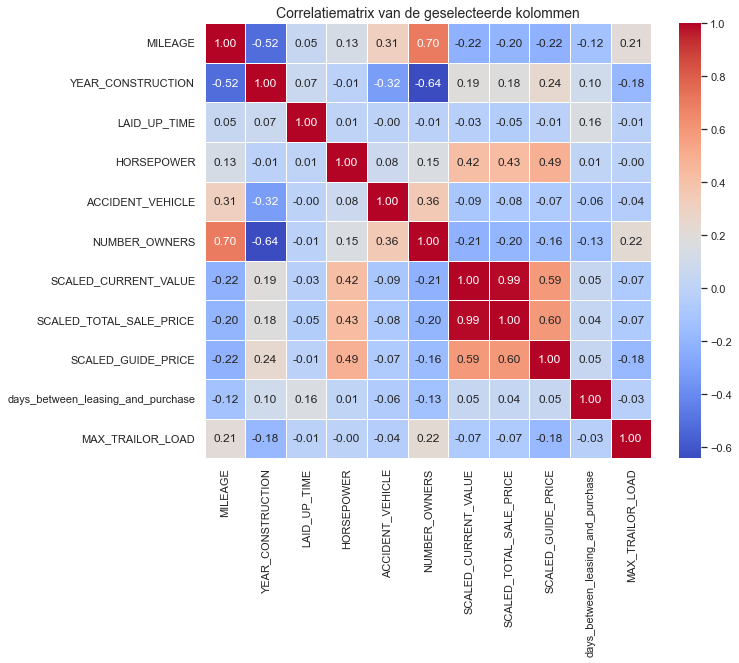

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecteer de kolommen voor de correlatiematrix
columns = ['MILEAGE', 'YEAR_CONSTRUCTION', 'LAID_UP_TIME', 'HORSEPOWER', 
           'ACCIDENT_VEHICLE', 'NUMBER_OWNERS', 
           'SCALED_CURRENT_VALUE', 'SCALED_TOTAL_SALE_PRICE', 'SCALED_GUIDE_PRICE','days_between_leasing_and_purchase','MAX_TRAILOR_LOAD']

# Bereken de correlatiematrix
correlation_matrix = df_cleaned[columns].corr()

# Maak de plot
plt.figure(figsize=(10, 8))

# Maak de heatmap van de correlatiematrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Voeg een titel toe
plt.title("Correlatiematrix van de geselecteerde kolommen", fontsize=14)

# Toon de grafiek
plt.show()


In [266]:
# Get the unique companies
unique_companies = df_cleaned['COMPANY'].unique()
print(unique_companies)


[44. 12. 27. 33. 10. 17. 32. 16. 29. 18. 35. 47. 24. 20. 72. 70. 36.]


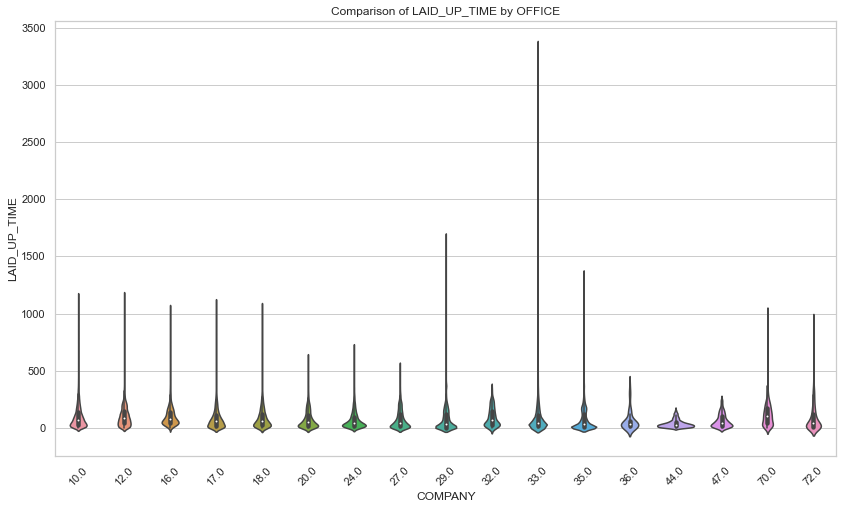

In [267]:
# Violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='COMPANY', y='LAID_UP_TIME', data=df_cleaned)
plt.title('Comparison of LAID_UP_TIME by OFFICE')
plt.xticks(rotation=45)
plt.show()

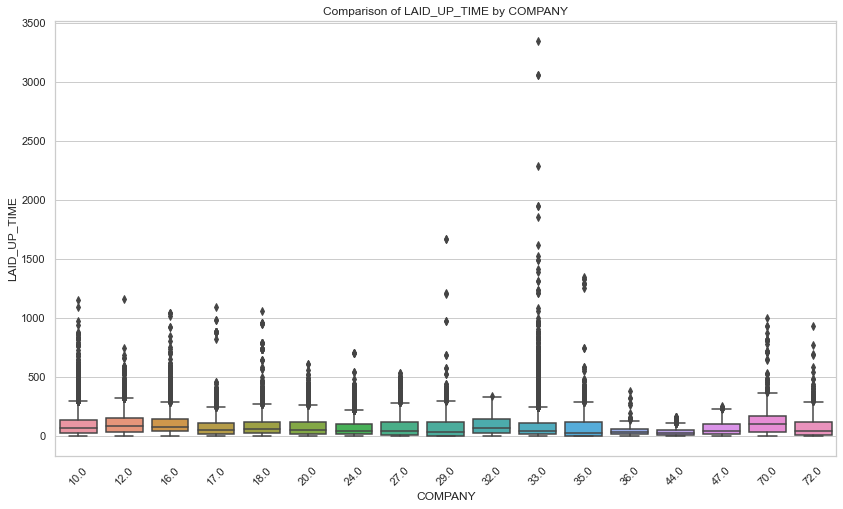

In [268]:
# Boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='COMPANY', y='LAID_UP_TIME', data=df_cleaned)
plt.title('Comparison of LAID_UP_TIME by COMPANY')
plt.xticks(rotation=45)
plt.show()

In [269]:
# Get the unique companies
unique_companies = df_cleaned['OFFICE'].unique()
print(unique_companies)


['TA' '44' '33' 'K1' '96' '13' '62' '46' '59' '60' '39' 'G4' 'K5' 'K3'
 '23' '20' '89' 'K2' '22' '52' 'P1' '31' '71' 'P5' '25' 'T7' 'J9' 'H5'
 'P4' '21' '10' '85' 'K4' '67' '64' 'G3' 'T1' '70' 'P6' 'K8' '61' '54'
 '49' '75' '95' '56' 'G2' '15' '5' 'J7' 'P2' '80' '28' 'T2' '18' '11' '38'
 '93' '92' 'T9' '76' '84' 'KA' 'S9' '69' '45' '58' '2' 'K7' '43' '55' '17'
 'J2' '30' '57' 'J8' '19' '37' '16' '65' '86' '94' 'T3' '1' 'unknown' '14'
 '72' 'TE' 'TD' '6' '36' 'H9' 'K6' 'T4' '4' 'KC' '47' '87' 'K9' '81' 'P3'
 'J5' '91' '68' 'G1' '12' 'FD' 'KD' '26' '77' '27' '24']


In [270]:
# Get the unique companies
unique_companies = df_cleaned['OFFICE_MAIN_BRAND'].unique()
print(unique_companies)


['TOY' 'VOL' 'SKO' 'V' 'FOR' 'FIA' 'unknown' 'WDB' 'OPE' 'BMW' 'C' 'JAG'
 'LEX' 'MAZ' 'FER' 'AM']


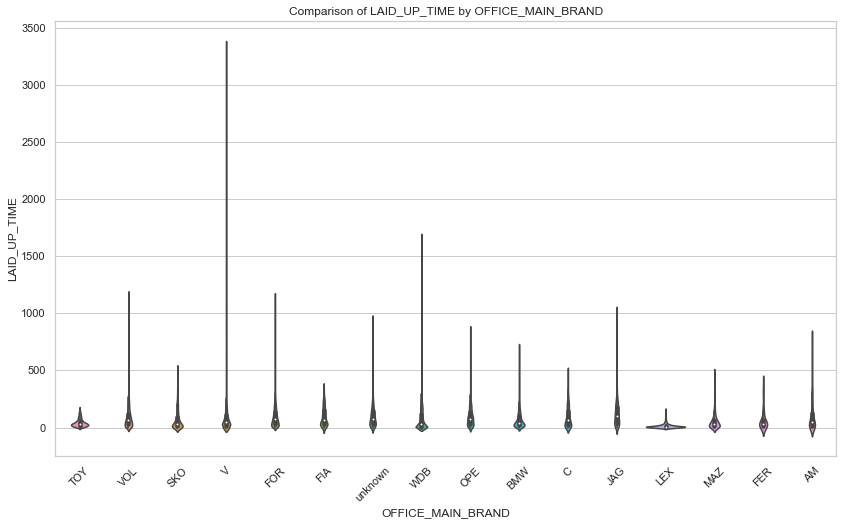

In [271]:
# Violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='OFFICE_MAIN_BRAND', y='LAID_UP_TIME', data=df_cleaned)
plt.title('Comparison of LAID_UP_TIME by OFFICE_MAIN_BRAND')
plt.xticks(rotation=45)
plt.show()

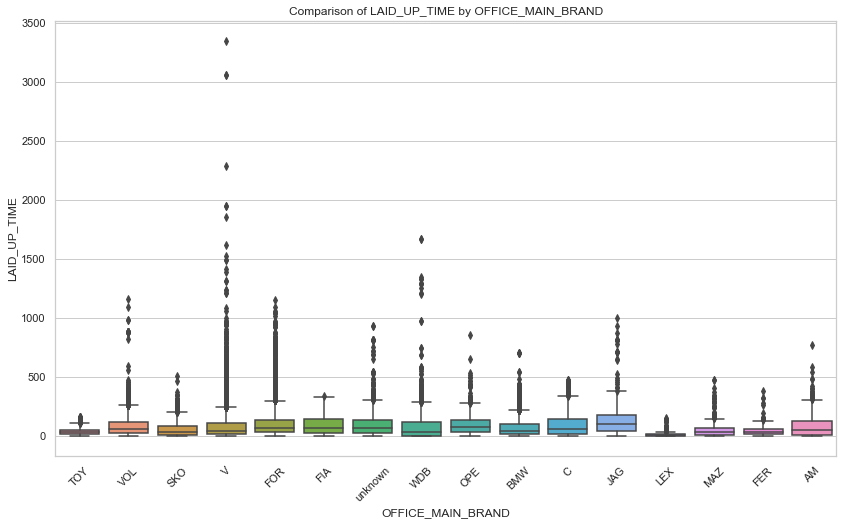

In [272]:
# Boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='OFFICE_MAIN_BRAND', y='LAID_UP_TIME', data=df_cleaned)
plt.title('Comparison of LAID_UP_TIME by OFFICE_MAIN_BRAND')
plt.xticks(rotation=45)
plt.show()

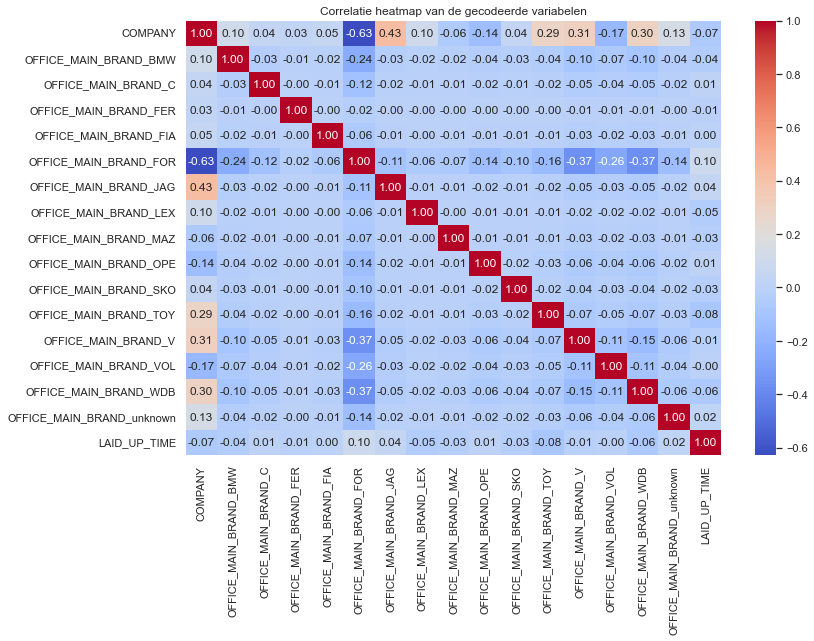

In [273]:
# One-hot encoding van categorische variabelen
df_encoded = pd.get_dummies(df_cleaned[['COMPANY', 'OFFICE_MAIN_BRAND']], drop_first=True)

# Voeg de numerieke kolom 'LAID_UP_TIME' toe
df_encoded['LAID_UP_TIME'] = df_cleaned['LAID_UP_TIME']

# Correlatie heatmap
plt.figure(figsize=(12, 8))
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlatie heatmap van de gecodeerde variabelen')
plt.show()


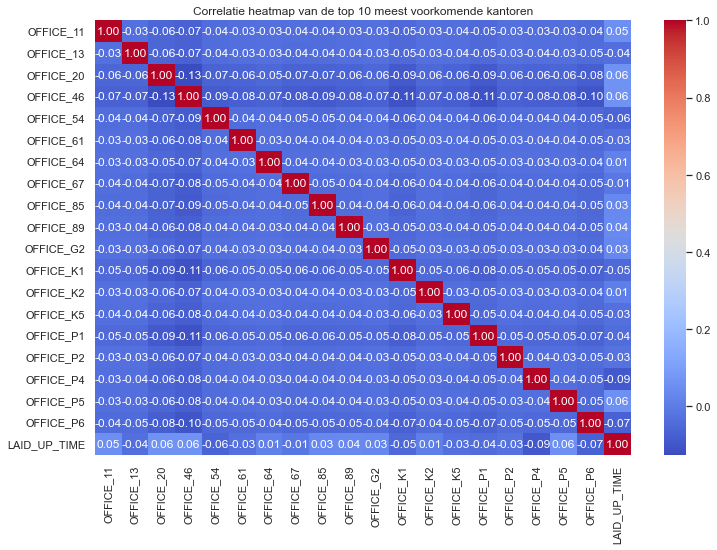

In [274]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Identify the top 10 most frequent categories in 'OFFICE'
top_offices = df_cleaned['OFFICE'].value_counts().nlargest(20).index

# Filter the dataframe to include only the top 10 offices
df_top_offices = df_cleaned[df_cleaned['OFFICE'].isin(top_offices)]

# One-hot encoding for the top 10 categories in 'OFFICE'
df_encoded = pd.get_dummies(df_top_offices[['OFFICE']], drop_first=True)

# Add the numerical 'LAID_UP_TIME' column
df_encoded['LAID_UP_TIME'] = df_top_offices['LAID_UP_TIME']

# Calculate the correlation matrix
plt.figure(figsize=(12, 8))
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlatie heatmap van de top 10 meest voorkomende kantoren')
plt.show()


In [275]:
# Get the unique companies
unique_companies = df_cleaned['MANUFACTURER_SHORT'].unique()
print(unique_companies)

['FOR' 'VOL' 'V' 'HYU' 'LAR' 'OPE' 'FIA' 'S' 'MG' 'JEE' 'BMW' 'WDB' 'ORA'
 'MIT' 'PEU' 'LMC' 'REN' 'TOY' 'JAG' 'ABA' 'BMI' 'NIS' 'MAZ' 'WME' 'AST'
 'C' 'MIN' 'LEX' 'BEN' 'KUM' 'A' 'FER' 'SUB' 'BUR' 'MER' 'ALF' 'KIA' 'CIT'
 'TSL' 'PIA' 'MAL' 'PS' '*' 'TES' 'GIO' 'INF' 'VW' 'P' 'SUN' 'HON' 'SMA'
 'PON' 'WEY' 'LAI' 'GWM' 'CUP' 'SUZ' 'FRE' 'ROB' 'DAC' 'LAN' 'CHE' 'STS'
 'RRO' 'SSA' 'DAI' 'unknown' 'HYM' 'MOT' 'DOD' 'LYN' 'SCR' 'TAB' 'MAS'
 'CAD' 'LAD' 'F' 'CHR']


In [276]:
# Get the unique companies
unique_companies = df_cleaned['VEHICLE_GROUP'].unique()
print(unique_companies)

['ECS' 'XC4' 'TOC' 'POL' 'FOC' 'MUS' 'I30' 'VLE' 'OPA' 'XC6' '500' 'OPM'
 'GOL' 'ATC' 'PAS' 'KUG' 'MG5' 'COM' 'ART' 'F10' 'GLB' 'MUV' 'PUM' 'EKL'
 'FUN' 'FIE' 'SPS' 'F40' 'GLC' 'OP4' 'UP' 'GLE' 'P08' '*' 'CUR' 'BON'
 'FRM' 'MON' '1' 'EPA' 'EVO' 'SPR' 'CKL' 'I20' 'WA' 'I10' 'CMA' 'TAI'
 'TIG' 'I01' 'GLA' 'QUA' 'M3' 'SME' 'TRO' 'TNC' 'TCR' 'CAD' '508' 'AMG'
 'DBS' 'F48' 'IPA' 'IO5' 'VKL' 'ENY' 'JUK' 'TAR' 'CLA' 'AVE' 'FAB' 'OCT'
 'KRO' 'SAN' '4' 'GLS' 'TNT' 'GCC' 'CIT' 'TRA' 'unknown' 'AKL' 'F56' '73'
 '83' 'OP1' 'X30' 'OPP' 'NFZ' 'TCU' 'CFA' 'E12' '9B' 'PKW' 'SMA' 'F55'
 'M2' 'NFS' 'FPA' 'CRL' 'V60' 'CX7' 'M6' 'SFF' 'G21' 'INS' 'MUE' 'G20'
 'A3' 'MX5' 'TRK' '19F' 'V90' 'A4' 'CX5' 'OPQ' 'F57' 'LD' 'TOU' 'CRA'
 'F45' 'LK' 'XC9' 'FIO' 'G29' 'G81' 'OPI' 'OPZ' 'OPD' 'CON' 'G30' 'V6C'
 'VIT' 'EQA' 'F39' 'BKL' 'F' 'NAR' '93' 'XV' 'CX6' 'EQB' 'XE' 'EQS' 'KAM'
 'U11' '20' 'G08' 'F54' 'POS' 'GRL' 'FRE' 'G26' 'SUP' 'ECL' 'GIA' 'SCA'
 'RAN' 'ECH' 'GLK' 'MEG' '208' 'TUC' '17' 'GKL' '8' 'TCO' 'FMT' '

In [277]:
# Get the unique companies
unique_companies = df_cleaned['VEHICLE_TYPE'].unique()
print(unique_companies)

['ECOSPORT 1.0 Titanium Eco' 'XC40 B3 B DKG Core 120 kW, 5-t'
 'Tourneo Connect 2.0 EcoBl' ... 'Astra 1.6 D Start/Stop Ed'
 'E 220 CDI Elegan' 'Range Rover P530 SWB']


In [278]:
# Get the unique companies
unique_companies = df_cleaned['COLOR'].unique()
print(unique_companies)

['Magnetic-Grau Metallic' 'Onyx Schwarz-Metallic' 'Ink Black Metallic' ...
 'classicrot' 'Byte Blue Mineraleffekt' 'Biela Moonlight Pearl']


In [279]:
# Get the unique companies
unique_companies = df_cleaned['FINANCING_TYPE'].unique()
print(unique_companies)

[1. 3. 2. 4. 5.]


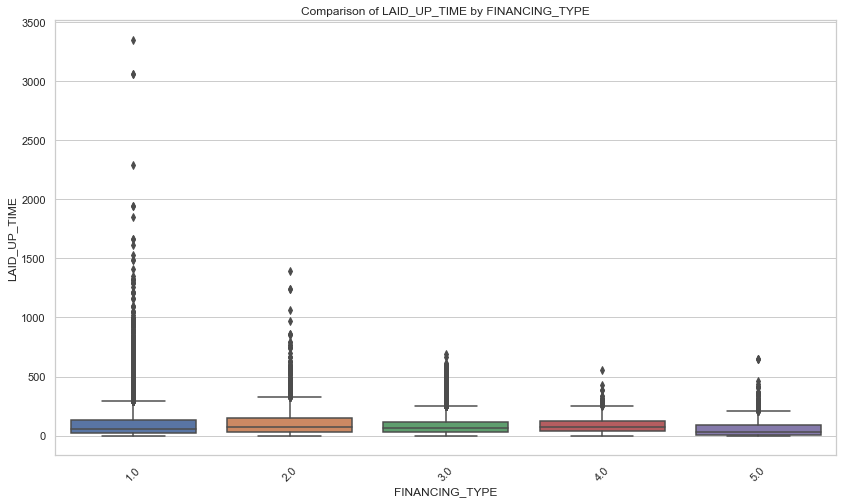

In [280]:
# Boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='FINANCING_TYPE', y='LAID_UP_TIME', data=df_cleaned)
plt.title('Comparison of LAID_UP_TIME by FINANCING_TYPE')
plt.xticks(rotation=45)
plt.show()

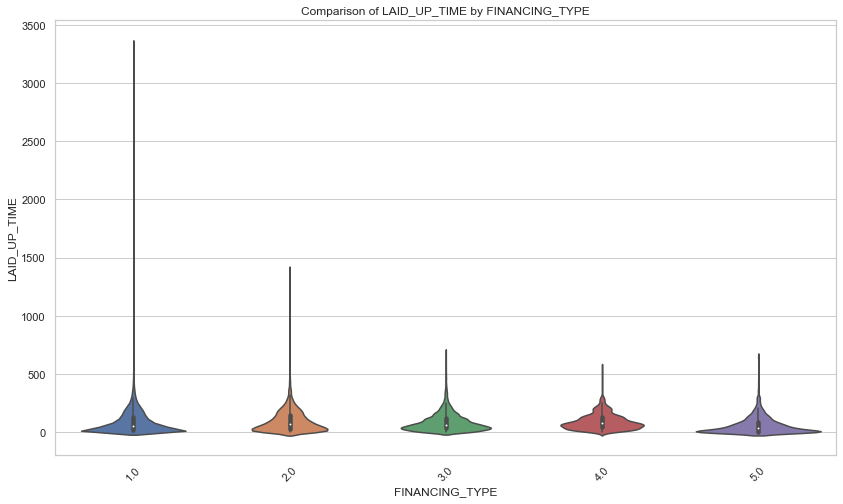

In [281]:
# Violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='FINANCING_TYPE', y='LAID_UP_TIME', data=df_cleaned)
plt.title('Comparison of LAID_UP_TIME by FINANCING_TYPE')
plt.xticks(rotation=45)
plt.show()

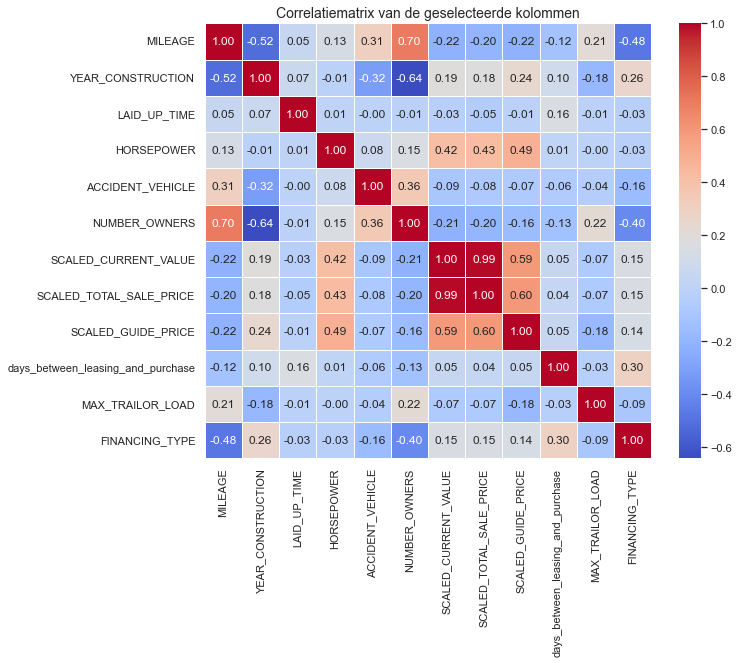

In [282]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecteer de kolommen voor de correlatiematrix
columns = ['MILEAGE', 'YEAR_CONSTRUCTION', 'LAID_UP_TIME', 'HORSEPOWER', 
           'ACCIDENT_VEHICLE', 'NUMBER_OWNERS', 
           'SCALED_CURRENT_VALUE', 'SCALED_TOTAL_SALE_PRICE', 'SCALED_GUIDE_PRICE','days_between_leasing_and_purchase','MAX_TRAILOR_LOAD','FINANCING_TYPE']

# Bereken de correlatiematrix
correlation_matrix = df_cleaned[columns].corr()

# Maak de plot
plt.figure(figsize=(10, 8))

# Maak de heatmap van de correlatiematrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Voeg een titel toe
plt.title("Correlatiematrix van de geselecteerde kolommen", fontsize=14)

# Toon de grafiek
plt.show()


In [283]:
# Get the unique companies
unique_companies = df_cleaned['FUEL_TYPE_NAME'].unique()
print(unique_companies)

['Bleifrei' 'Andere' 'Diesel' 'Elektro' 'Super' 'Hybrid/Super'
 'Hybrid/Bleifrei' 'Plug-In-Hybrid' 'Hybrid' 'Gas' 'Mild Hybrid']


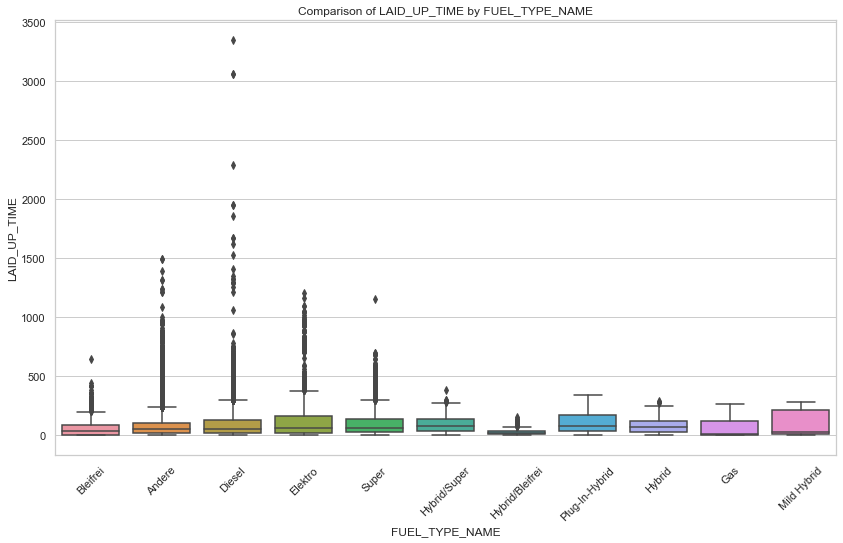

In [284]:
# Boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='FUEL_TYPE_NAME', y='LAID_UP_TIME', data=df_cleaned)
plt.title('Comparison of LAID_UP_TIME by FUEL_TYPE_NAME')
plt.xticks(rotation=45)
plt.show()

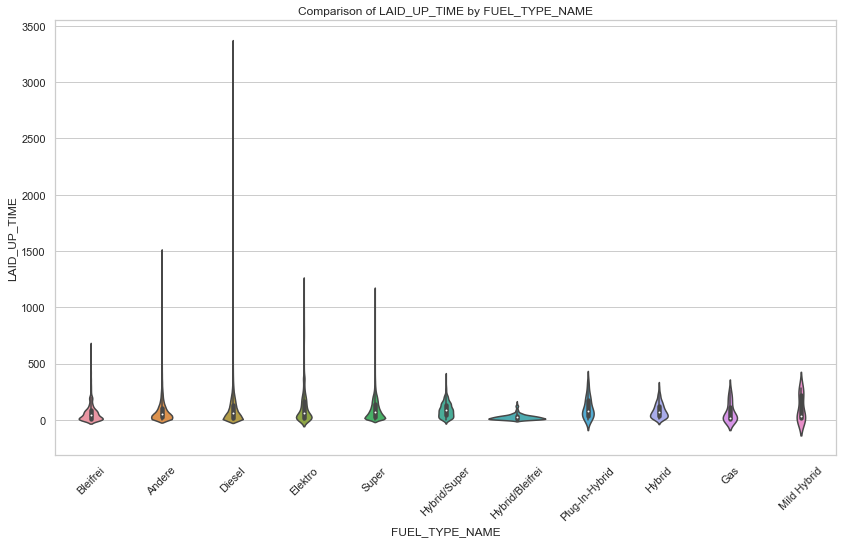

In [285]:
# Violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='FUEL_TYPE_NAME', y='LAID_UP_TIME', data=df_cleaned)
plt.title('Comparison of LAID_UP_TIME by FUEL_TYPE_NAME')
plt.xticks(rotation=45)
plt.show()

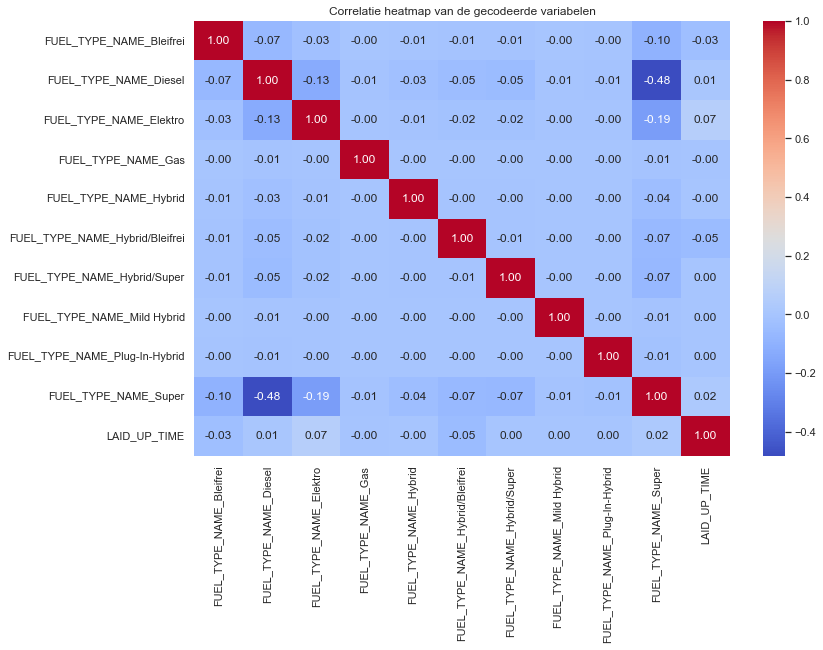

In [286]:
# One-hot encoding van categorische variabelen
df_encoded = pd.get_dummies(df_cleaned[['FUEL_TYPE_NAME']], drop_first=True)

# Voeg de numerieke kolom 'LAID_UP_TIME' toe
df_encoded['LAID_UP_TIME'] = df_cleaned['LAID_UP_TIME']

# Correlatie heatmap
plt.figure(figsize=(12, 8))
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlatie heatmap van de gecodeerde variabelen')
plt.show()


In [287]:
# Get the unique companies
unique_companies = df_cleaned['COMMISSION_TYPE'].unique()
print(unique_companies)

['2' '1' '6' '5' 'T']


In [288]:
# Vervang 'T' door 3 in de kolom 'COMMISSION_TYPE'
df_cleaned['COMMISSION_TYPE'] = df_cleaned['COMMISSION_TYPE'].replace('T', 3)

# Controleer de unieke waarden na de vervanging
unique_commission_types = df_cleaned['COMMISSION_TYPE'].unique()
print(unique_commission_types)


['2' '1' '6' '5' 3]


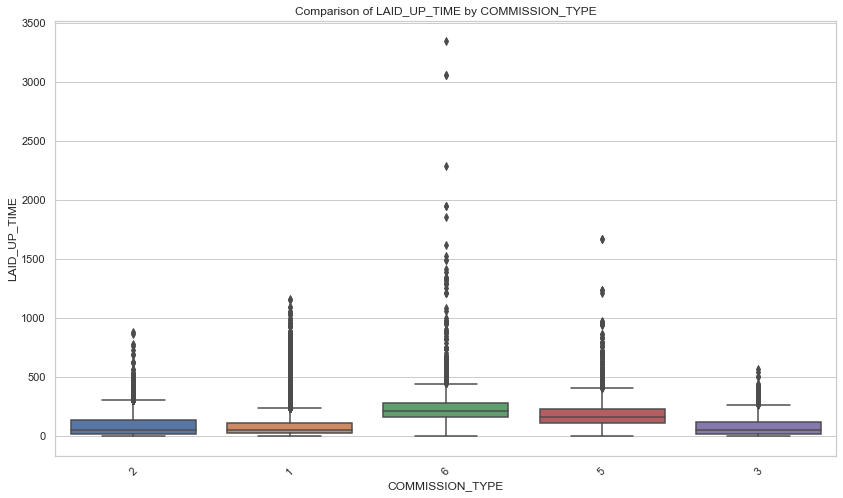

In [289]:
# Boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='COMMISSION_TYPE', y='LAID_UP_TIME', data=df_cleaned)
plt.title('Comparison of LAID_UP_TIME by COMMISSION_TYPE')
plt.xticks(rotation=45)
plt.show()

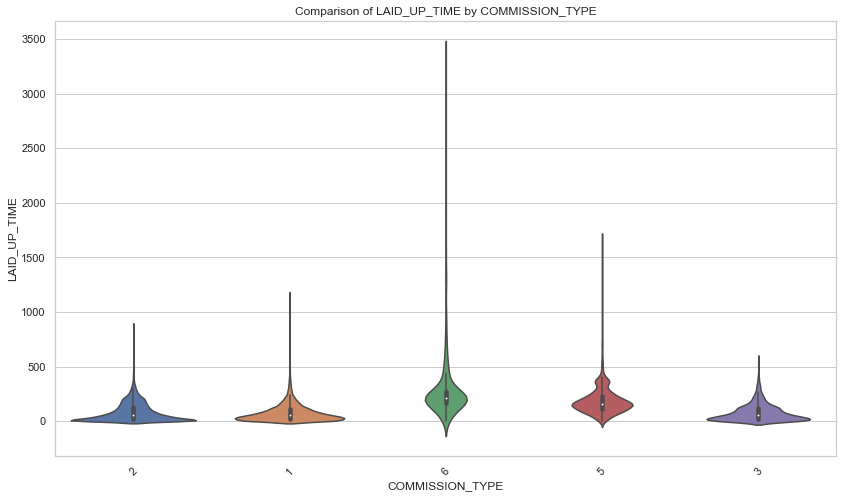

In [290]:
# Violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='COMMISSION_TYPE', y='LAID_UP_TIME', data=df_cleaned)
plt.title('Comparison of LAID_UP_TIME by COMMISSION_TYPE')
plt.xticks(rotation=45)
plt.show()

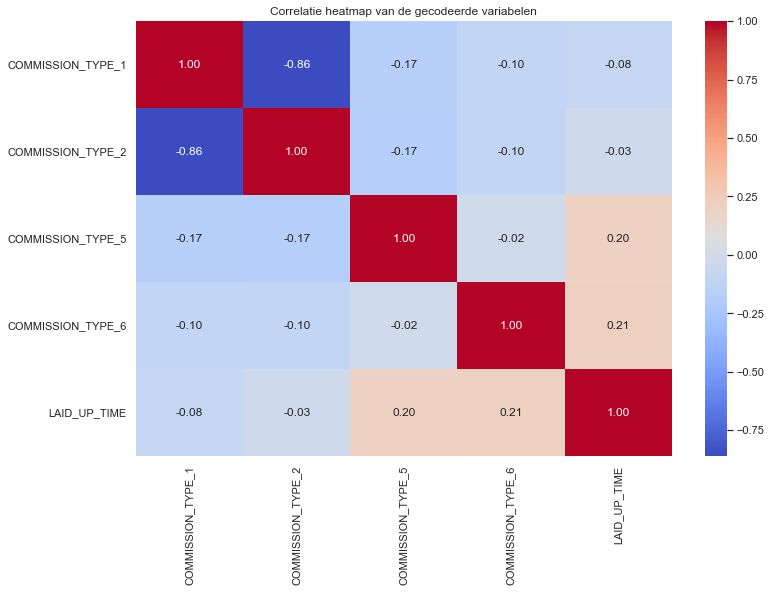

In [291]:
# One-hot encoding van categorische variabelen
df_encoded = pd.get_dummies(df_cleaned[['COMMISSION_TYPE']], drop_first=True)

# Voeg de numerieke kolom 'LAID_UP_TIME' toe
df_encoded['LAID_UP_TIME'] = df_cleaned['LAID_UP_TIME']

# Correlatie heatmap
plt.figure(figsize=(12, 8))
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlatie heatmap van de gecodeerde variabelen')
plt.show()


In [292]:
# Get the unique companies
unique_companies = df_cleaned['VEHICLE_MODEL_ID_NAME'].unique()
print(unique_companies)

['Keine Zuteilung' 'Gelaendewagen/Pickup' 'Van/Kleinbus' 'Kombi'
 'Limousine' 'Nutzfahrzeuge' 'Cabrio/Roadster' 'Sportwagen/CoupÃƒÂ©'
 'Kleinwagen' 'Andere']


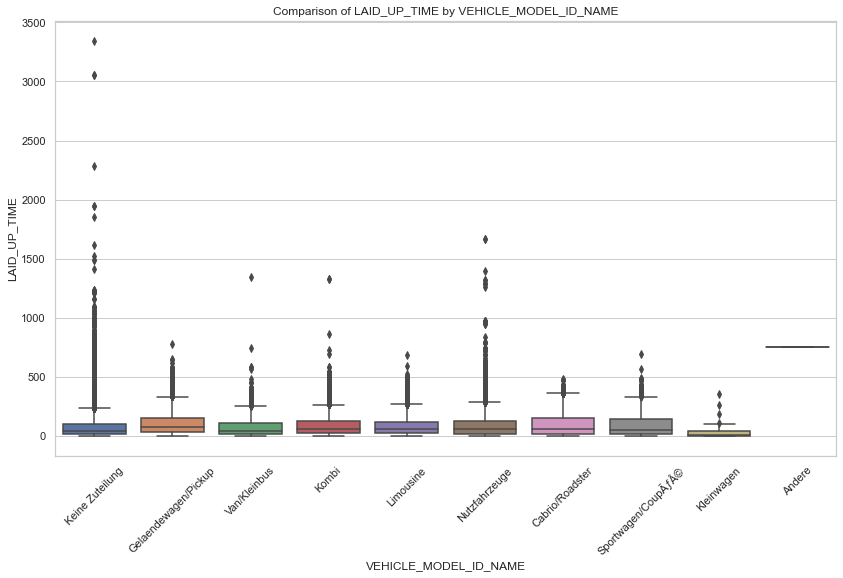

In [293]:
# Boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='VEHICLE_MODEL_ID_NAME', y='LAID_UP_TIME', data=df_cleaned)
plt.title('Comparison of LAID_UP_TIME by VEHICLE_MODEL_ID_NAME')
plt.xticks(rotation=45)
plt.show()

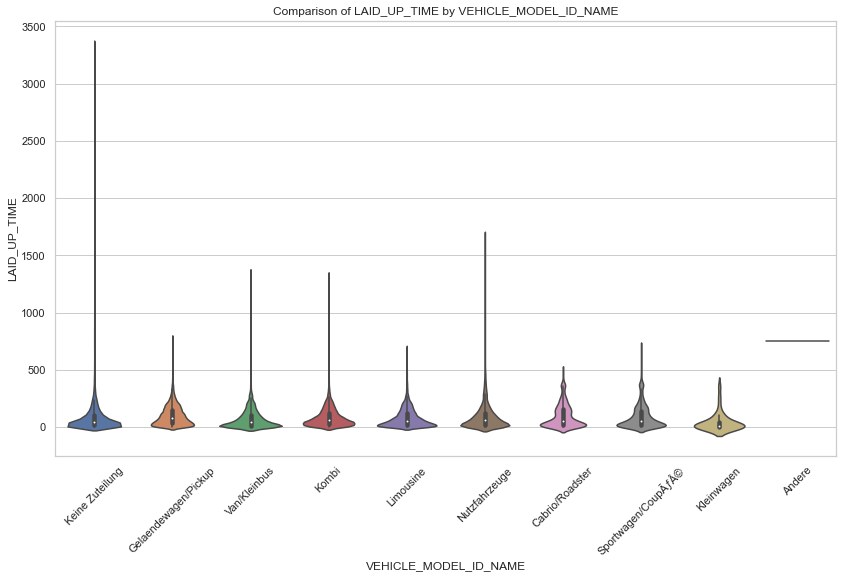

In [294]:
# Violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='VEHICLE_MODEL_ID_NAME', y='LAID_UP_TIME', data=df_cleaned)
plt.title('Comparison of LAID_UP_TIME by VEHICLE_MODEL_ID_NAME')
plt.xticks(rotation=45)
plt.show()

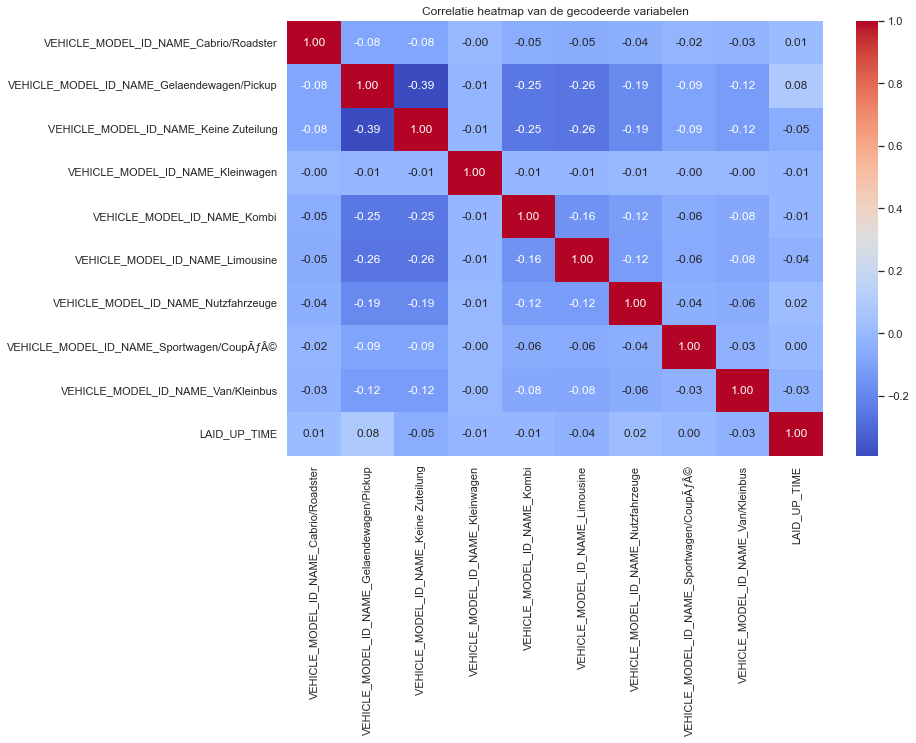

In [295]:
# One-hot encoding van categorische variabelen
df_encoded = pd.get_dummies(df_cleaned[['VEHICLE_MODEL_ID_NAME']], drop_first=True)

# Voeg de numerieke kolom 'LAID_UP_TIME' toe
df_encoded['LAID_UP_TIME'] = df_cleaned['LAID_UP_TIME']

# Correlatie heatmap
plt.figure(figsize=(12, 8))
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlatie heatmap van de gecodeerde variabelen')
plt.show()


In [296]:
# Get the number of unique groups (categories) in the 'stroke' column
Ngroups = df_cleaned["LAID_UP_TIME"].nunique()

# Get the total number of observations in the dataset
Ntotal = len(df_cleaned.index)

# Import necessary libraries
from scipy import stats

# Define a function to compute ANOVA statistics for a given attribute
def anova_stats(attribute):
    # Create a list of lists containing the attribute values for each group (stroke category)
    groupdata = [data[attribute].tolist() for _, data in df_cleaned.groupby("LAID_UP_TIME")]
    
    # Perform one-way ANOVA test
    F, p = stats.f_oneway(*groupdata)
    
    # Calculate the effect size (η^2)
    η2 = F * (Ngroups-1) / (F * (Ngroups-1) + Ntotal - Ngroups)
    
    return F, p, η2

# Apply the ANOVA function to each numerical attribute in the dataset
anova = {attribute: anova_stats(attribute) for attribute in df_cleaned.select_dtypes(include='number').columns}

# Create a DataFrame to display ANOVA statistics
pd.DataFrame(anova, index=["$F$", "$p$", "$\eta^2$"]).T

/Users/jortgommers/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


,$F$,$p$,$\eta^2$
COMPANY,5.640403,0.000000e+00,0.038454
MILEAGE,5.621185,0.000000e+00,0.038328
MILAGE_SALES,2.460882,3.070334e-86,0.017149
MAX_TRAILOR_LOAD,2.627397,2.626433e-101,0.018288
YEAR_CONSTRUCTION,4.968416,0.000000e+00,0.034029
HORSEPOWER,2.286656,3.505031e-71,0.015954
NUMBER_OWNERS,4.459445,5.733834e-294,0.030649
FINANCING_TYPE,3.665269,7.063653e-206,0.025329
LAID_UP_TIME,inf,0.000000e+00,NaN
SCALED_CURRENT_VALUE,NaN,NaN,NaN


In [297]:
print(df_cleaned.head())

   COMPANY OFFICE OFFICE_MAIN_BRAND MANUFACTURER_SHORT VEHICLE_GROUP  \
0     44.0     TA               TOY                FOR           ECS   
1     12.0     44               VOL                VOL           XC4   
2     27.0     33               SKO                FOR           TOC   
3     33.0     K1                 V                  V           POL   
4     10.0     96               FOR                FOR           FOC   

                     VEHICLE_TYPE   MILEAGE  MILAGE_SALES  \
0       ECOSPORT 1.0 Titanium Eco  9.059634        8600.0   
1  XC40 B3 B DKG Core 120 kW, 5-t  0.000000           0.0   
2       Tourneo Connect 2.0 EcoBl  7.168580           0.0   
3   POLO LIFE 1,0 L 59 KW (80 PS)  8.703009        6020.0   
4  FOCUS TITA 5W 1.0T 125 MHEV M6  0.000000           0.0   

                       COLOR  MAX_TRAILOR_LOAD  ...  FUEL_TYPE_NAME  \
0     Magnetic-Grau Metallic               0.0  ...        Bleifrei   
1      Onyx Schwarz-Metallic               0.0  ...       

In [298]:
# 1. Zoek object-kolommen (duidelijk categorisch)
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()

# 2. Zoek numerieke kolommen met een klein aantal unieke waarden (potentieel categorisch)
for col in df_cleaned.select_dtypes(include=['int64', 'float64']).columns:
    if df_cleaned[col].nunique() < 20:  # Drempelwaarde voor categorisch (kan je aanpassen)
        categorical_cols.append(col)

print("Categorische kolommen:", categorical_cols)

Categorische kolommen: ['OFFICE', 'OFFICE_MAIN_BRAND', 'MANUFACTURER_SHORT', 'VEHICLE_GROUP', 'VEHICLE_TYPE', 'COLOR', 'FUEL_TYPE_NAME', 'COMMISSION_TYPE', 'VEHICLE_MODEL_ID_NAME', 'COMPANY', 'NUMBER_OWNERS', 'FINANCING_TYPE', 'ACCIDENT_VEHICLE']


In [299]:
from sklearn.preprocessing import LabelEncoder

# Lijst van categorische kolommen
categorical_cols = ['COMMISSION_TYPE', 'VEHICLE_MODEL_ID_NAME', 'COMPANY', 
                    'OFFICE_MAIN_BRAND', 'NUMBER_OWNERS', 'FINANCING_TYPE', 
                    'FUEL_TYPE_NAME', 'ACCIDENT_VEHICLE']

# Dictionary om de encoders op te slaan
label_encoders = {}

# Zorg dat alle categorische kolommen als string worden behandeld
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].astype(str)

# Loop door alle categorische kolommen en pas LabelEncoder toe
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])  # Encode kolom
    label_encoders[col] = le  # Opslaan van encoder

# Controleer het resultaat
print(df_cleaned.head())


   COMPANY OFFICE  OFFICE_MAIN_BRAND MANUFACTURER_SHORT VEHICLE_GROUP  \
0       13     TA                 11                FOR           ECS   
1        1     44                 13                VOL           XC4   
2        7     33                 10                FOR           TOC   
3       10     K1                 12                  V           POL   
4        0     96                  5                FOR           FOC   

                     VEHICLE_TYPE   MILEAGE  MILAGE_SALES  \
0       ECOSPORT 1.0 Titanium Eco  9.059634        8600.0   
1  XC40 B3 B DKG Core 120 kW, 5-t  0.000000           0.0   
2       Tourneo Connect 2.0 EcoBl  7.168580           0.0   
3   POLO LIFE 1,0 L 59 KW (80 PS)  8.703009        6020.0   
4  FOCUS TITA 5W 1.0T 125 MHEV M6  0.000000           0.0   

                       COLOR  MAX_TRAILOR_LOAD  ...  FUEL_TYPE_NAME  \
0     Magnetic-Grau Metallic               0.0  ...               1   
1      Onyx Schwarz-Metallic               0.0  ... 

In [300]:
print(df_cleaned[categorical_cols].head())


   COMMISSION_TYPE  VEHICLE_MODEL_ID_NAME  COMPANY  OFFICE_MAIN_BRAND  \
0                1                      3       13                 11   
1                0                      2        1                 13   
2                0                      9        7                 10   
3                0                      3       10                 12   
4                0                      5        0                  5   

   NUMBER_OWNERS  FINANCING_TYPE  FUEL_TYPE_NAME  ACCIDENT_VEHICLE  
0              1               0               1                 0  
1              0               2               0                 0  
2              0               2               2                 0  
3              0               0               0                 0  
4              0               2               0                 0  


In [301]:
import pandas as pd

# Zorg ervoor dat de kolom een datetime-formaat heeft
df_cleaned['PURCHASE_DATE'] = pd.to_datetime(df_cleaned['PURCHASE_DATE'])

# Extraheer relevante tijdsfeatures
df_cleaned['PURCHASE_YEAR'] = df_cleaned['PURCHASE_DATE'].dt.year
df_cleaned['PURCHASE_MONTH'] = df_cleaned['PURCHASE_DATE'].dt.month
df_cleaned['PURCHASE_WEEKDAY'] = df_cleaned['PURCHASE_DATE'].dt.weekday  # Maandag=0, Zondag=6

# Verwijder de originele datumkolom (optioneel)
df_cleaned.drop(columns=['PURCHASE_DATE'], inplace=True)

# Controleer het resultaat
print(df_cleaned[['PURCHASE_YEAR', 'PURCHASE_MONTH', 'PURCHASE_WEEKDAY']].head())


   PURCHASE_YEAR  PURCHASE_MONTH  PURCHASE_WEEKDAY
0           2024               2                 3
1           2024               7                 2
2           2024               5                 3
3           2023               7                 3
4           2024               5                 0


In [302]:
# Controleer op missende waarden in de geselecteerde kolommen
missing_values = df_cleaned.isnull().sum()

# Toon de missende waarden per kolom
print(missing_values)

COMPANY                              0
OFFICE                               0
OFFICE_MAIN_BRAND                    0
MANUFACTURER_SHORT                   0
VEHICLE_GROUP                        0
VEHICLE_TYPE                         0
MILEAGE                              0
MILAGE_SALES                         0
COLOR                                0
MAX_TRAILOR_LOAD                     0
YEAR_CONSTRUCTION                    0
HORSEPOWER                           0
NUMBER_OWNERS                        0
FINANCING_TYPE                       0
FUEL_TYPE_NAME                       0
LAID_UP_TIME                         0
SCALED_CURRENT_VALUE                 1
SCALED_GUIDE_PRICE                   2
SCALED_TOTAL_SALE_PRICE              1
ACCIDENT_VEHICLE                     0
COMMISSION_TYPE                      0
VEHICLE_MODEL_ID_NAME                0
days_between_leasing_and_purchase    0
PURCHASE_YEAR                        0
PURCHASE_MONTH                       0
PURCHASE_WEEKDAY         

In [303]:
df_cleaned['SCALED_CURRENT_VALUE'].fillna(df_cleaned['SCALED_CURRENT_VALUE'].mean(), inplace=True)
df_cleaned['SCALED_GUIDE_PRICE'].fillna(df_cleaned['SCALED_GUIDE_PRICE'].mean(), inplace=True)
df_cleaned['SCALED_TOTAL_SALE_PRICE'].fillna(df_cleaned['SCALED_TOTAL_SALE_PRICE'].mean(), inplace=True)

# Check missing values after replacement
print("\nMissing values after replacement:\n", df_cleaned.isnull().sum())



Missing values after replacement:
 COMPANY                              0
OFFICE                               0
OFFICE_MAIN_BRAND                    0
MANUFACTURER_SHORT                   0
VEHICLE_GROUP                        0
VEHICLE_TYPE                         0
MILEAGE                              0
MILAGE_SALES                         0
COLOR                                0
MAX_TRAILOR_LOAD                     0
YEAR_CONSTRUCTION                    0
HORSEPOWER                           0
NUMBER_OWNERS                        0
FINANCING_TYPE                       0
FUEL_TYPE_NAME                       0
LAID_UP_TIME                         0
SCALED_CURRENT_VALUE                 0
SCALED_GUIDE_PRICE                   0
SCALED_TOTAL_SALE_PRICE              0
ACCIDENT_VEHICLE                     0
COMMISSION_TYPE                      0
VEHICLE_MODEL_ID_NAME                0
days_between_leasing_and_purchase    0
PURCHASE_YEAR                        0
PURCHASE_MONTH              

# Vanaf hier kunnen er kolommen verwijderd worden om de features te verkleinen en de verschillende resultaten te zien

In [304]:
print(df_cleaned.head())

   COMPANY OFFICE  OFFICE_MAIN_BRAND MANUFACTURER_SHORT VEHICLE_GROUP  \
0       13     TA                 11                FOR           ECS   
1        1     44                 13                VOL           XC4   
2        7     33                 10                FOR           TOC   
3       10     K1                 12                  V           POL   
4        0     96                  5                FOR           FOC   

                     VEHICLE_TYPE   MILEAGE  MILAGE_SALES  \
0       ECOSPORT 1.0 Titanium Eco  9.059634        8600.0   
1  XC40 B3 B DKG Core 120 kW, 5-t  0.000000           0.0   
2       Tourneo Connect 2.0 EcoBl  7.168580           0.0   
3   POLO LIFE 1,0 L 59 KW (80 PS)  8.703009        6020.0   
4  FOCUS TITA 5W 1.0T 125 MHEV M6  0.000000           0.0   

                       COLOR  MAX_TRAILOR_LOAD  ...  SCALED_CURRENT_VALUE  \
0     Magnetic-Grau Metallic               0.0  ...              0.052907   
1      Onyx Schwarz-Metallic            

In [305]:
from sklearn.preprocessing import LabelEncoder

# Lijst van categorische kolommen
categorical_cols = ['COLOR','VEHICLE_TYPE','MANUFACTURER_SHORT','VEHICLE_GROUP','OFFICE']

# Dictionary om de encoders op te slaan
label_encoders = {}

# Zorg dat alle categorische kolommen als string worden behandeld
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].astype(str)

# Loop door alle categorische kolommen en pas LabelEncoder toe
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])  # Encode kolom
    label_encoders[col] = le  # Opslaan van encoder

# Controleer het resultaat
print(df_cleaned.head())


   COMPANY  OFFICE  OFFICE_MAIN_BRAND  MANUFACTURER_SHORT  VEHICLE_GROUP  \
0       13     108                 11                  21            218   
1        1      30                 13                  72            600   
2        7      23                 10                  21            546   
3       10      83                 12                  71            474   
4        0      70                  5                  21            288   

   VEHICLE_TYPE   MILEAGE  MILAGE_SALES  COLOR  MAX_TRAILOR_LOAD  ...  \
0          4249  9.059634        8600.0   2359               0.0  ...   
1         12474  0.000000           0.0   2845               0.0  ...   
2         11127  7.168580           0.0   1782               0.0  ...   
3          8578  8.703009        6020.0   3283               0.0  ...   
4          4885  0.000000           0.0    131               0.0  ...   

   SCALED_CURRENT_VALUE  SCALED_GUIDE_PRICE  SCALED_TOTAL_SALE_PRICE  \
0              0.052907         

In [306]:
print(df_cleaned.dtypes)


COMPANY                                int64
OFFICE                                 int64
OFFICE_MAIN_BRAND                      int64
MANUFACTURER_SHORT                     int64
VEHICLE_GROUP                          int64
VEHICLE_TYPE                           int64
MILEAGE                              float64
MILAGE_SALES                         float64
COLOR                                  int64
MAX_TRAILOR_LOAD                     float64
YEAR_CONSTRUCTION                    float64
HORSEPOWER                           float64
NUMBER_OWNERS                          int64
FINANCING_TYPE                         int64
FUEL_TYPE_NAME                         int64
LAID_UP_TIME                         float64
SCALED_CURRENT_VALUE                 float64
SCALED_GUIDE_PRICE                   float64
SCALED_TOTAL_SALE_PRICE              float64
ACCIDENT_VEHICLE                       int64
COMMISSION_TYPE                        int64
VEHICLE_MODEL_ID_NAME                  int64
days_betwe

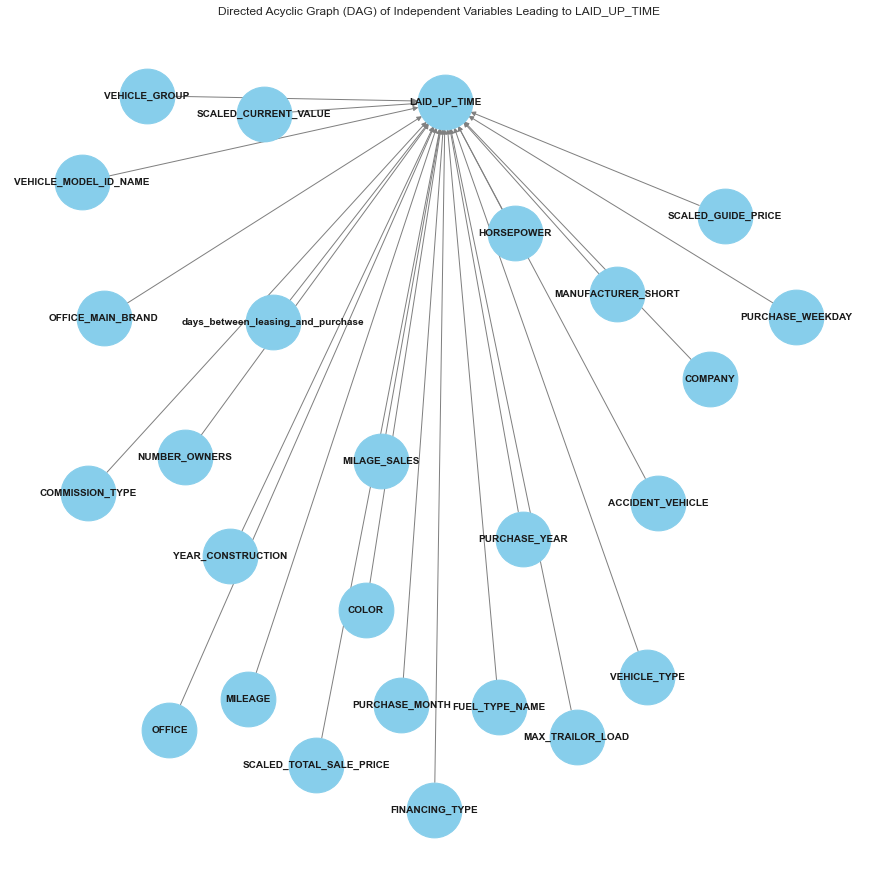

In [307]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the independent variables and the dependent variable
independent_vars = [
    "COMPANY", "OFFICE", "OFFICE_MAIN_BRAND", "MANUFACTURER_SHORT", "VEHICLE_GROUP", 
    "VEHICLE_TYPE", "MILEAGE", "MILAGE_SALES", "COLOR", "MAX_TRAILOR_LOAD", 
    "YEAR_CONSTRUCTION", "HORSEPOWER", "NUMBER_OWNERS", "FINANCING_TYPE", "FUEL_TYPE_NAME", 
    "SCALED_CURRENT_VALUE", "SCALED_GUIDE_PRICE", "SCALED_TOTAL_SALE_PRICE", "ACCIDENT_VEHICLE", 
    "COMMISSION_TYPE", "VEHICLE_MODEL_ID_NAME", "days_between_leasing_and_purchase", 
    "PURCHASE_YEAR", "PURCHASE_MONTH", "PURCHASE_WEEKDAY"
]

# The dependent variable
dependent_var = "LAID_UP_TIME"

# Create a directed graph
G = nx.DiGraph()

# Add nodes for each variable (independent + dependent)
G.add_node(dependent_var)
for var in independent_vars:
    G.add_node(var)

# Add directed edges from independent variables to the dependent variable
for var in independent_vars:
    G.add_edge(var, dependent_var)

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # Positioning of nodes
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title("Directed Acyclic Graph (DAG) of Independent Variables Leading to LAID_UP_TIME")
plt.show()


In [308]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler and use it to scale numerical features in the 'stroke' dataset
scaled = StandardScaler().fit_transform(df_cleaned.select_dtypes(include='number'))

In [309]:
import numpy as np

# Create a DataFrame to display mean and standard deviation for each feature after scaling
statistics_df = pd.DataFrame({
    'mean': np.mean(scaled, axis=0),
    'std': np.std(scaled, axis=0)
}, index=df_cleaned.columns[0:26])
statistics_df

,mean,std
COMPANY,-1.578952e-17,1.0
OFFICE,-8.791892e-18,1.0
OFFICE_MAIN_BRAND,-1.062204e-17,1.0
MANUFACTURER_SHORT,-8.138780e-17,1.0
VEHICLE_GROUP,-1.195697e-16,1.0
VEHICLE_TYPE,9.009895e-17,1.0
MILEAGE,3.489484e-16,1.0
MILAGE_SALES,-2.978478e-18,1.0
COLOR,1.421057e-17,1.0
MAX_TRAILOR_LOAD,1.492827e-17,1.0


In [311]:
# Get the number of unique groups (categories) in the 'stroke' column
Ngroups = df_cleaned["LAID_UP_TIME"].nunique()

# Get the total number of observations in the dataset
Ntotal = len(df_cleaned.index)

from scipy import stats

# Define a function to compute ANOVA statistics for a given attribute
def anova_stats(attribute):
    # Create a list of lists containing the attribute values for each group (stroke category)
    groupdata = [data[attribute].tolist() for _, data in df_cleaned.groupby("LAID_UP_TIME")]
    
    # Perform one-way ANOVA test
    F, p = stats.f_oneway(*groupdata)
    
    # Calculate the effect size (η^2)
    η2 = F * (Ngroups-1) / (F * (Ngroups-1) + Ntotal - Ngroups)
    
    return F, p, η2

# Apply the ANOVA function to each numerical attribute in the dataset
anova = {attribute: anova_stats(attribute) for attribute in df_cleaned.select_dtypes(include='number').columns}

# Create a DataFrame to display ANOVA statistics
pd.DataFrame(anova, index=["$F$", "$p$", "$\eta^2$"]).T

/Users/jortgommers/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


,$F$,$p$,$\eta^2$
COMPANY,7.737074,0.000000e+00,0.052005
OFFICE,6.940807,0.000000e+00,0.046904
OFFICE_MAIN_BRAND,6.301906,0.000000e+00,0.042771
MANUFACTURER_SHORT,4.950019,0.000000e+00,0.033907
VEHICLE_GROUP,2.492322,4.897092e-89,0.017364
VEHICLE_TYPE,2.978065,7.731414e-135,0.020679
MILEAGE,5.621185,0.000000e+00,0.038328
MILAGE_SALES,2.460882,3.070334e-86,0.017149
COLOR,4.504138,4.569137e-299,0.030947
MAX_TRAILOR_LOAD,2.627397,2.626433e-101,0.018288


In [ ]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled = scaler.fit_transform(df_cleaned.drop(columns=["LAID_UP_TIME"]))  # Exclude target

# Fit PCA on the scaled data
pca = PCA().fit(scaled)

# Transform the scaled data using PCA
components = pca.transform(scaled)

# Iterate over the first 4 principal components
for n in range(4):
    # Create attribute names for the principal components
    attribute = f"PC-{n+1}"
    
    # Add new columns to the 'stroke' DataFrame with the principal component values
    df_cleaned[attribute] = components[:, n]
    
    # Perform ANOVA on the newly added principal component
    anova[attribute] = anova_stats(attribute)

In [313]:
pd.DataFrame(anova, index=["$F$", "$p$", "$\eta^2$"]).T

,$F$,$p$,$\eta^2$
COMPANY,7.737074,0.000000e+00,0.052005
OFFICE,6.940807,0.000000e+00,0.046904
OFFICE_MAIN_BRAND,6.301906,0.000000e+00,0.042771
MANUFACTURER_SHORT,4.950019,0.000000e+00,0.033907
VEHICLE_GROUP,2.492322,4.897092e-89,0.017364
VEHICLE_TYPE,2.978065,7.731414e-135,0.020679
MILEAGE,5.621185,0.000000e+00,0.038328
MILAGE_SALES,2.460882,3.070334e-86,0.017149
COLOR,4.504138,4.569137e-299,0.030947
MAX_TRAILOR_LOAD,2.627397,2.626433e-101,0.018288


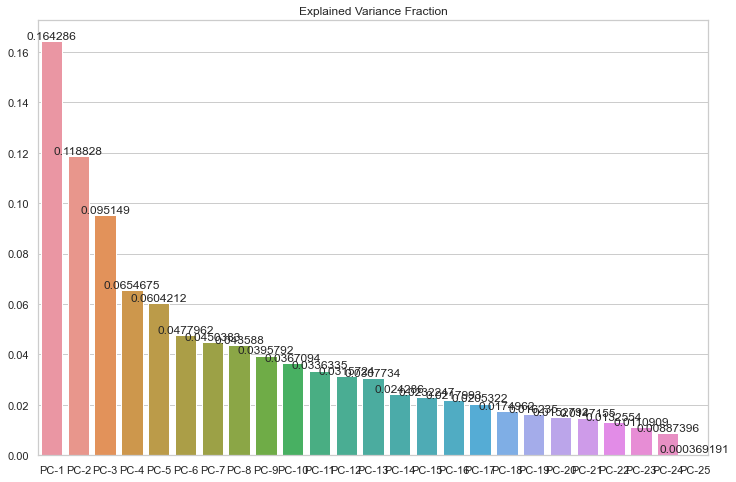

In [318]:
import matplotlib.pyplot as plt

# Stel de grootte van de grafiek in
plt.figure(figsize=(12, 8))  # Breedte = 10 inches, Hoogte = 6 inches

# Maak je plot
axs = sns.barplot(x=[f"PC-{n+1}" for n in range(len(pca.explained_variance_ratio_))], 
                  y=pca.explained_variance_ratio_)

# Voeg labels toe aan de staven
axs.bar_label(axs.containers[0])

# Zet de titel
axs.set_title("Explained Variance Fraction")

# Toon de plot
plt.show()


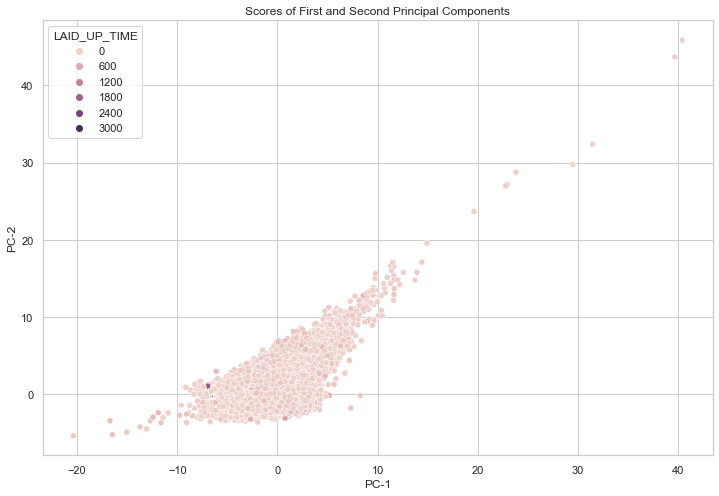

In [324]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Breedte = 10 inches, Hoogte = 6 inches
# Maak een scatter plot om de scores van de eerste en tweede principale componenten te visualiseren
axs = sns.scatterplot(data=df_cleaned, x="PC-1", y="PC-2", hue="LAID_UP_TIME")

# Zet de titel van de plot
axs.set_title("Scores of First and Second Principal Components")

# Toon de plot
plt.show()


In [330]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np


models = [
    DummyClassifier,
    DecisionTreeClassifier,
    LinearDiscriminantAnalysis,
    GaussianNB,
    KNeighborsClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    MLPClassifier,
    LogisticRegression,
    RidgeClassifier
]

In [331]:
# Splits de dataset in kenmerken (X) en target (y)
X = df_cleaned.drop('LAID_UP_TIME', axis=1)
y = df_cleaned['LAID_UP_TIME']

# Maak een dictionary om de resultaten op te slaan
metric_scores = {}

# Itereer door elk model en evalueer
for model in models:
    # Voer cross-validation uit (2-voudige cross-validatie hier)
    scores = cross_validate(model(), X, y, cv=2, return_train_score=False, 
                            scoring=['r2', 'neg_root_mean_squared_error'])
    
    # Neem het gemiddelde van de scores
    model_scores = {
        'R2': scores['test_r2'].mean(),
        'RMSE': -scores['test_neg_root_mean_squared_error'].mean()  # negatieve RMSE moet positief worden gemaakt
    }
    
    # Sla de resultaten op in de dictionary
    metric_scores[f"{model.__name__}"] = model_scores

# Zet de resultaten om in een DataFrame voor een duidelijk overzicht
results_df = pd.DataFrame(metric_scores).T

# Print de resultaten
print(results_df)

/Users/jortgommers/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/Users/jortgommers/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/Users/jortgommers/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/Users/jortgommers/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/Users/jortgommers/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only

                                   R2        RMSE
DummyClassifier             -0.842215  130.309072
DecisionTreeClassifier       0.280959   81.414909
LinearDiscriminantAnalysis  -0.620198  122.203147
GaussianNB                 -10.718344  328.301187
KNeighborsClassifier        -0.276476  108.469239
RandomForestClassifier       0.486342   68.812143
AdaBoostClassifier          -0.825772  129.726205
MLPClassifier               -0.797403  128.717658
LogisticRegression          -0.810986  129.206378
RidgeClassifier             -0.553369  119.643976


| Model                      | R²        | RMSE       |
|----------------------------|-----------|------------|
| **DummyClassifier**         | -0.842215 | 130.309072 |
| **DecisionTreeClassifier**  | 0.280959  | 81.414909  |
| **LinearDiscriminantAnalysis** | -0.620198 | 122.203147 |
| **GaussianNB**              | -10.718344| 328.301187 |
| **KNeighborsClassifier**    | -0.276476 | 108.469239 |
| **RandomForestClassifier**  | 0.486342  | 68.812143  |
| **AdaBoostClassifier**      | -0.825772 | 129.726205 |
| **MLPClassifier**           | -0.797403 | 128.717658 |
| **LogisticRegression**      | -0.810986 | 129.206378 |
| **RidgeClassifier**         | -0.553369 | 119.643976 |


In [332]:
# Sla de DataFrame (df_cleaned) op als een CSV-bestand
df_cleaned.to_csv('df_cleaned.csv', index=False)

print("Data is succesvol opgeslagen als 'df_cleaned.csv'")


Data is succesvol opgeslagen als 'df_cleaned.csv'
